In [1]:
from models.utils import set_global_seed
set_global_seed(42)
from torchvision import transforms
from torchvision.datasets import FashionMNIST, CIFAR10, CIFAR100, MNIST
from models.cleaner import NoiseCleaner
from models.predictor import Predictor

# Instance Independent

In [7]:
train_dataset = FashionMNIST(root='data', train=True, download=True)
transform = transforms.Compose([
            transforms.Grayscale(num_output_channels=3),
            transforms.Resize((224, 224)),
            transforms.ToTensor()
        ])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='iin', model_save_path="fmnist/resnet18/model_resnet18_fmnist_fold_{}.pth", folds_num=5, model='resnet18', train_noise_level=0.2, epochs_num=20, transform=transform)

TypeError: NoiseCleaner.__init__() got an unexpected keyword argument 'folds_num'

In [ ]:
noise_cleaner.clean()

Training fold 1/5...


Epoch 0/20:   0%|          | 0/20 [00:08<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = FashionMNIST(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, model_type='resnet18', batch_size=400, num_epochs=50)

In [ ]:
predictor.train(10)

In [ ]:
predictor.evaluate()

Evaluating: 100%|██████████| 25/25 [00:10<00:00,  2.49it/s]

Test Accuracy: 92.33%


0.9233

# Instance Dependent

## FMnist

In [3]:
train_dataset = FashionMNIST(root='data', train=True, download=False)
transform = transforms.Compose([
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
augmented_transform = transforms.Compose([
                                # transforms.RandomCrop(size=32, padding=4),
                                # transforms.RandomHorizontalFlip(),
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="fmnist/resnet18/model_resnet18_fmnist_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='wresnet50', train_noise_level=0.2, epochs_num=100, train_pairs=20000, 
                             val_pairs=10000, embedding_dimension=128, lr=1e-3, optimizer='Adam', patience=10, transform=transform,
                             weight_decay=0.0001, training_batch_size=1024, pre_trained=False, dropout_prob=0.2, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce')

Seed: 78


KeyboardInterrupt: 

handling big fold 1/10
number_of_pairs: 4309
Training fold 1/10...


Epoch 10/100:  11%|█         | 11/100 [04:45<38:29, 25.94s/it, val_loss=4.7, val_accuracy=10.6, train_loss=4.7, best_accuracy=10.9]

Early stopping triggered
Loading best model from checkpoint...


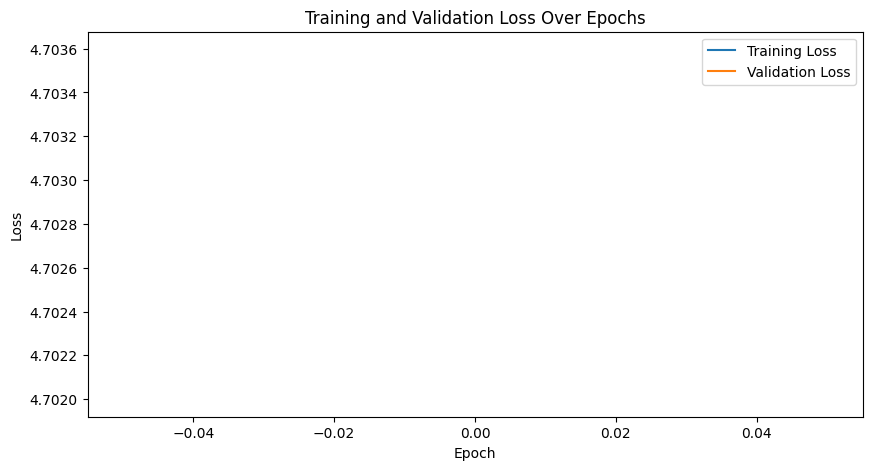

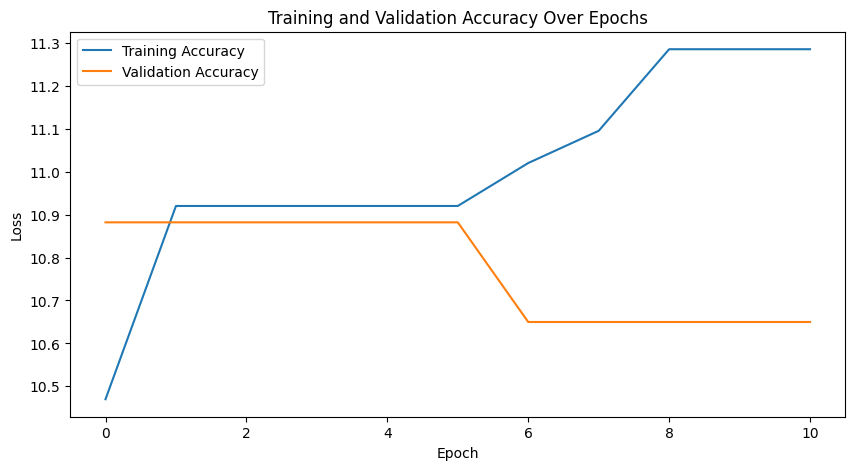

Extracting Embeddings: 100%|██████████| 485/485 [00:06<00:00, 69.79it/s]


Distance between embedding 6589 and 2885: 0.0031
Distance between embedding 6589 and 4016: 0.0037
Distance between embedding 6589 and 5862: 0.0039
Distance between embedding 6589 and 3761: 0.0016
Distance between embedding 6589 and 2201: 0.0011
Distance between embedding 6589 and 6468: 0.0009
Distance between embedding 6589 and 3726: 0.0013
Distance between embedding 6589 and 5161: 0.0011
Distance between embedding 6589 and 1572: 0.0013
Distance between embedding 6589 and 4632: 0.0019
Distance between embedding 6589 and 1639: 0.0010
Distance between embedding 6589 and 399: 0.0013
Distance between embedding 6589 and 1987: 0.0009
Distance between embedding 6589 and 7109: 0.0010
Distance between embedding 6589 and 5832: 0.0011
Distance between embedding 6589 and 6283: 0.0049
Distance between embedding 6589 and 6233: 0.0047
Distance between embedding 6589 and 354: 0.0022
Distance between embedding 6589 and 3924: 0.0028
Distance between embedding 2885 and 4016: 0.0023
Distance between embed

Testing: 100%|██████████| 485/485 [00:06<00:00, 75.06it/s]
/home/aref/.conda/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 10.88%
Test Precision: 0.01
Test Recall: 0.11
Test F1 Score: 0.02
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 29/100:  29%|██▉       | 29/100 [12:49<31:24, 26.54s/it, val_loss=3.44, val_accuracy=63.5, train_loss=2.81, best_accuracy=66.8]


KeyboardInterrupt: 

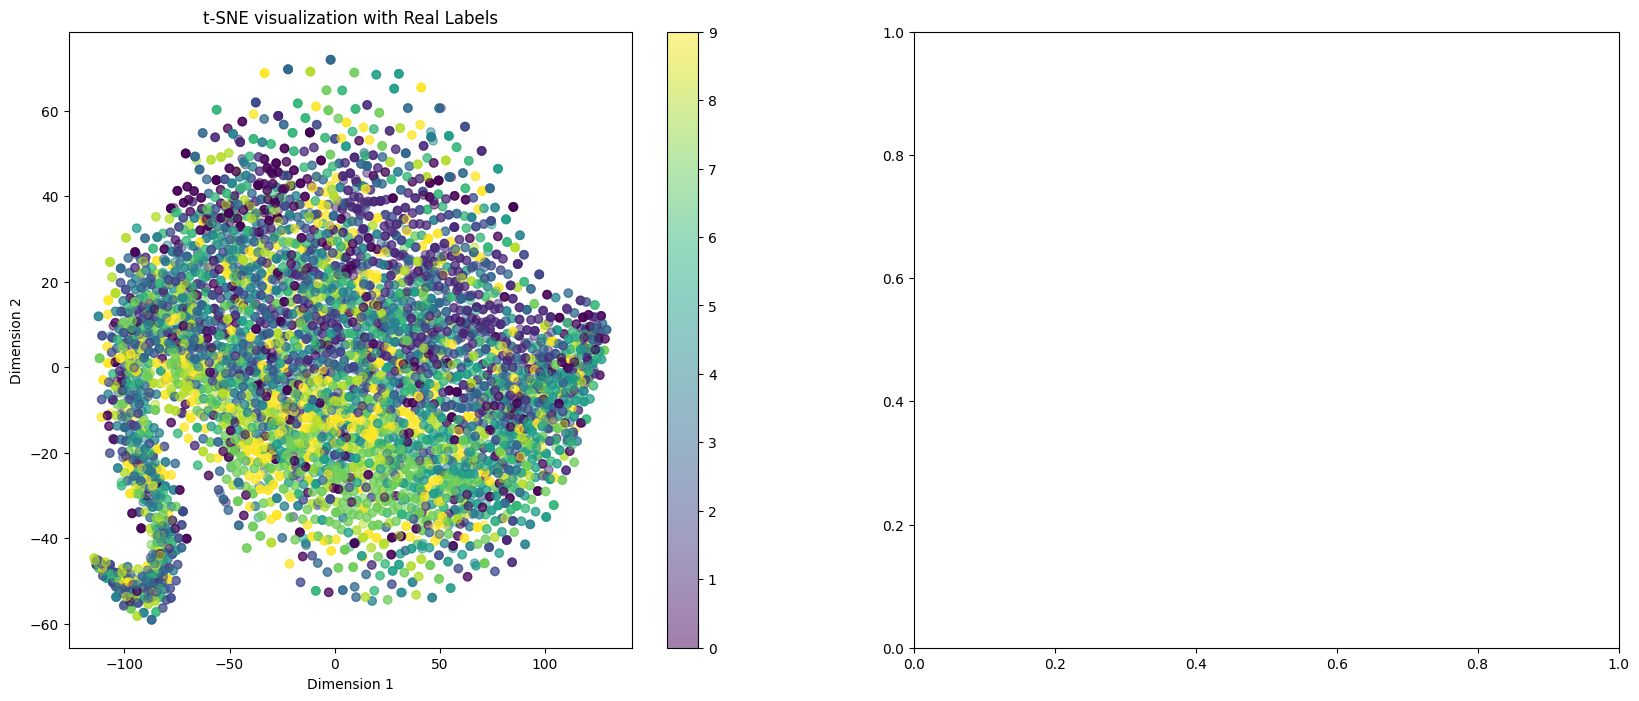

In [ ]:
noise_cleaner.clean()

In [ ]:
import models.predictor
import models
import importlib
importlib.reload(models)
from models import preact
importlib.reload(preact)
from models import predictor
importlib.reload(predictor)
from models.predictor import Predictor

In [ ]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = FashionMNIST(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, model_type='resnet18', batch_size=400)

In [ ]:
predictor.train(10)

Training Epoch 1/10: 100%|██████████| 113/113 [01:40<00:00,  1.12it/s]


Validation Accuracy: 93.46%
Epoch 1/10, Loss: 0.24129432162879844


Training Epoch 2/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 96.31%
Epoch 2/10, Loss: 0.12274887458940523


Training Epoch 3/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 97.07%
Epoch 3/10, Loss: 0.08064110191390578


Training Epoch 4/10: 100%|██████████| 113/113 [01:39<00:00,  1.14it/s]


Validation Accuracy: 96.81%
Epoch 4/10, Loss: 0.07340764353233101


Training Epoch 5/10: 100%|██████████| 113/113 [01:39<00:00,  1.14it/s]


Validation Accuracy: 96.51%
Epoch 5/10, Loss: 0.059963096196936294


Training Epoch 6/10: 100%|██████████| 113/113 [01:38<00:00,  1.15it/s]


Validation Accuracy: 97.89%
Epoch 6/10, Loss: 0.0528966288980657


Training Epoch 7/10: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s]


Validation Accuracy: 97.85%
Epoch 7/10, Loss: 0.03885995962582858


Training Epoch 8/10: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s]


Validation Accuracy: 97.95%
Epoch 8/10, Loss: 0.03452066272760915


Training Epoch 9/10: 100%|██████████| 113/113 [01:40<00:00,  1.12it/s]


Validation Accuracy: 98.30%
Epoch 9/10, Loss: 0.030963845262551203


Training Epoch 10/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 98.22%
Epoch 10/10, Loss: 0.02610123477282777


In [ ]:
predictor.evaluate()

Evaluating: 100%|██████████| 25/25 [00:11<00:00,  2.25it/s]

Test Accuracy: 90.21%


0.9021

## CIFAR 10 - 20

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.2, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=8, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 10208 out of 50000 data


In [3]:
noise_cleaner.save_noisy_dataset('cleaned', 'dirty')

100%|██████████| 50000/50000 [00:03<00:00, 12964.02it/s]

Noisy dataset saved to cleaned/dirty.pkl


In [5]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
80.21077283372365% accuracy in 854 data
Loaded 854 noisy indices from cifar10/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
79.53488372093022% accuracy in 860 data
Loaded 860 noisy indices from cifar10/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
78.55504587155964% accuracy in 872 data
Loaded 872 noisy indices from cifar10/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
80.02466091245375% accuracy in 811 data
Loaded 811 noisy indices from cifar10/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
80.62770562770562% accuracy in 924 data
Loaded 924 noisy indices from cifar10/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
77.0011273957159% accuracy in 887 data
Loaded 887 noisy indices from cifar10/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
79.57992998833139% accuracy in 857 data
Loaded 857 noisy indices from cifar10/resne

              precision    recall  f1-score   support

       Clean     0.9762    0.8961    0.9344     39792
       Noisy     0.6932    0.9149    0.7887     10208

    accuracy                         0.8999     50000
   macro avg     0.8347    0.9055    0.8616     50000
weighted avg     0.9184    0.8999    0.9047     50000



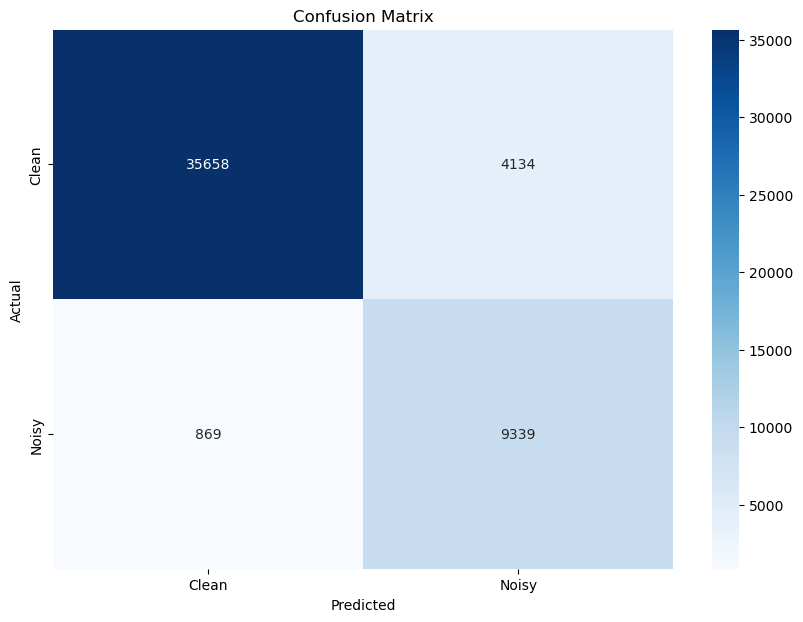

In [3]:
noise_cleaner.report(mistakes_count=8)

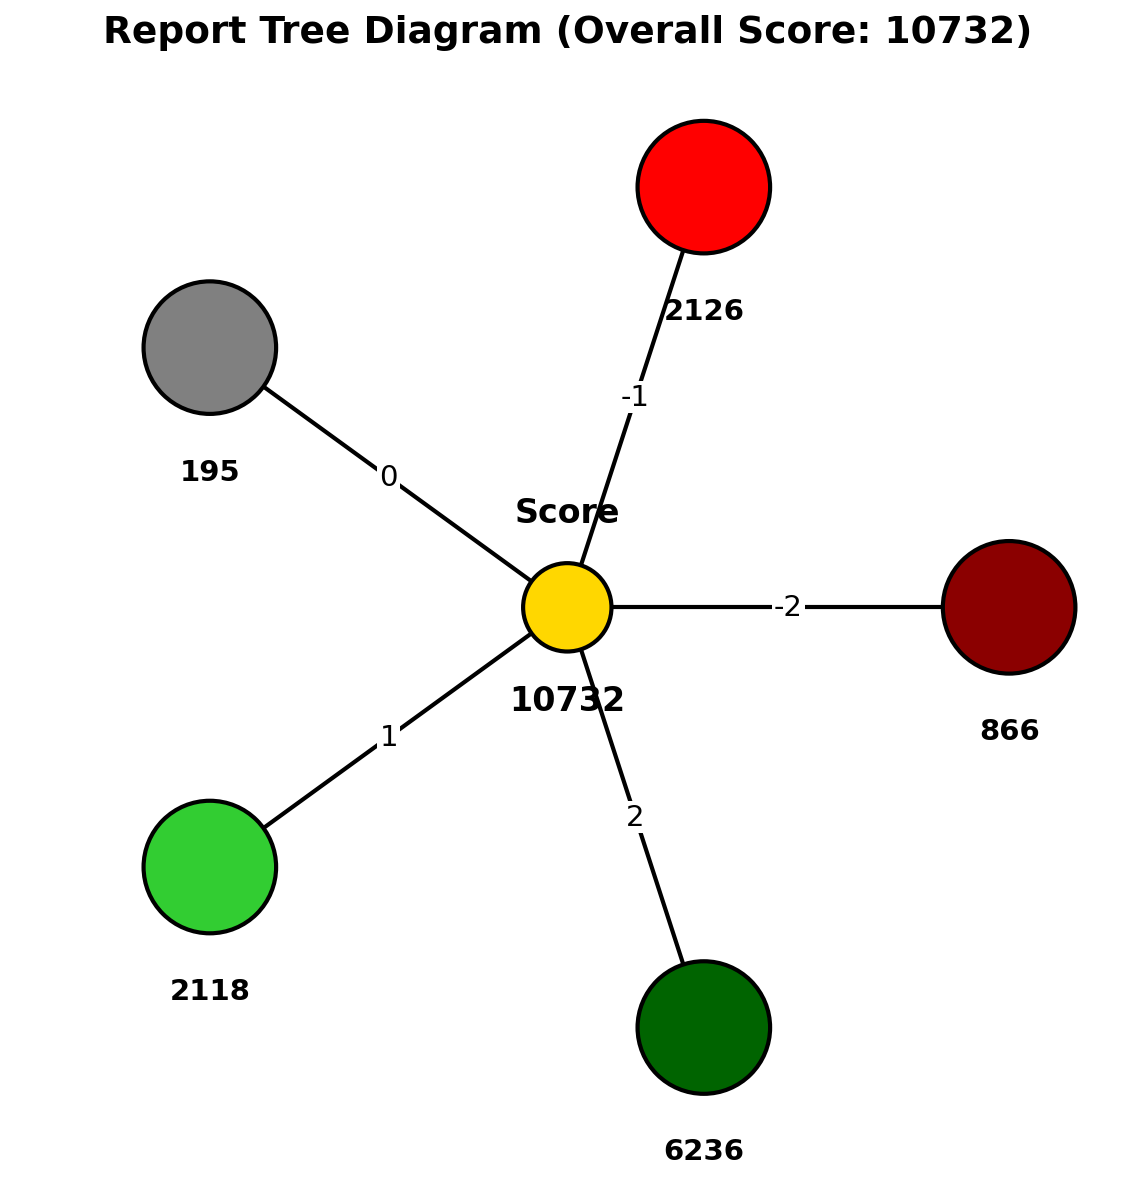

In [11]:
score, relabeling_report = noise_cleaner.calculate_relabeling_score(mistakes_count=9, relabel_threshold=9)

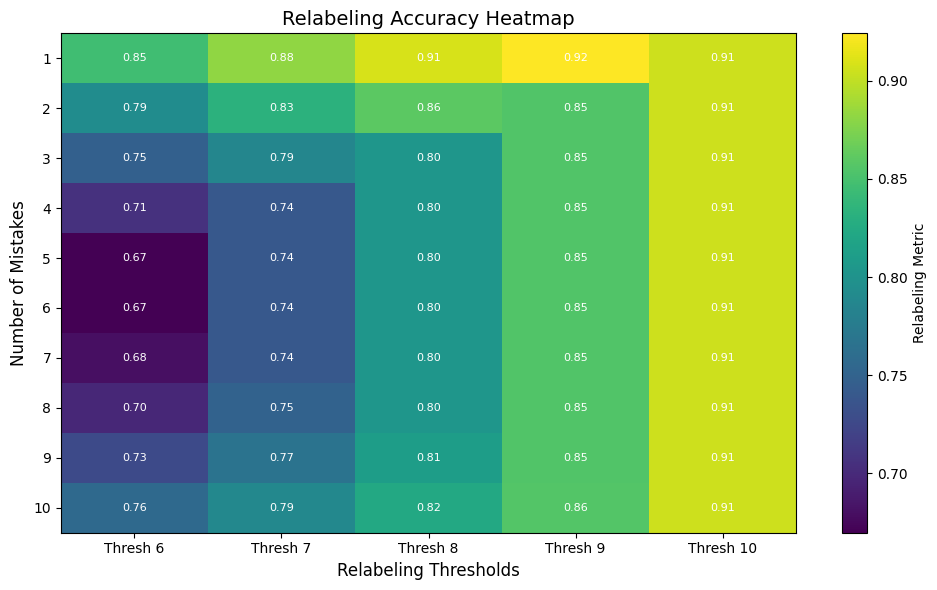

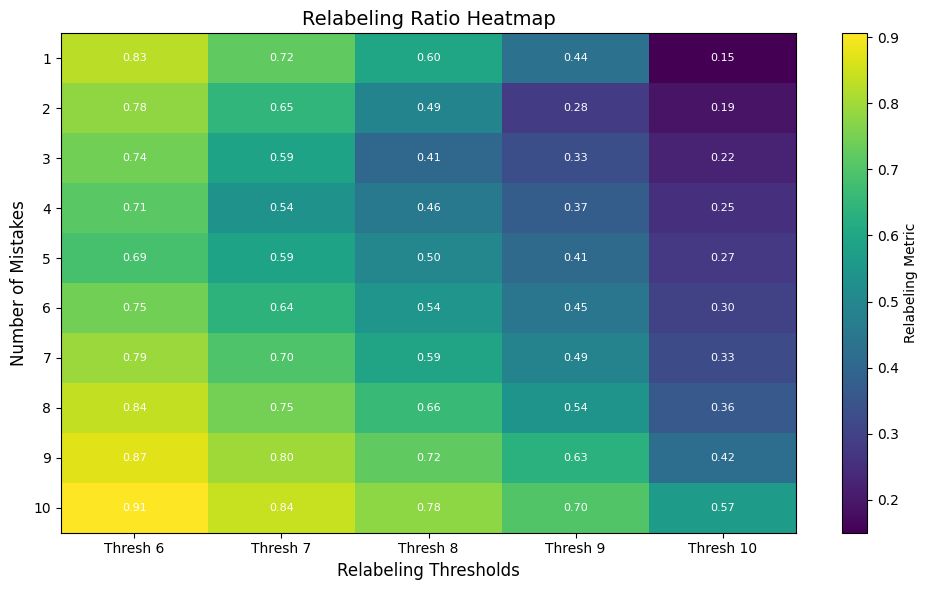

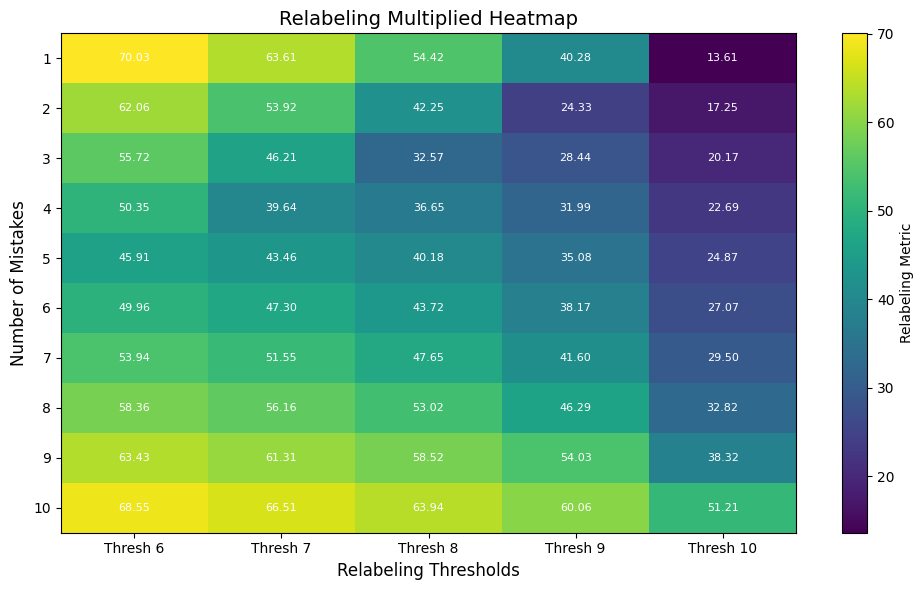

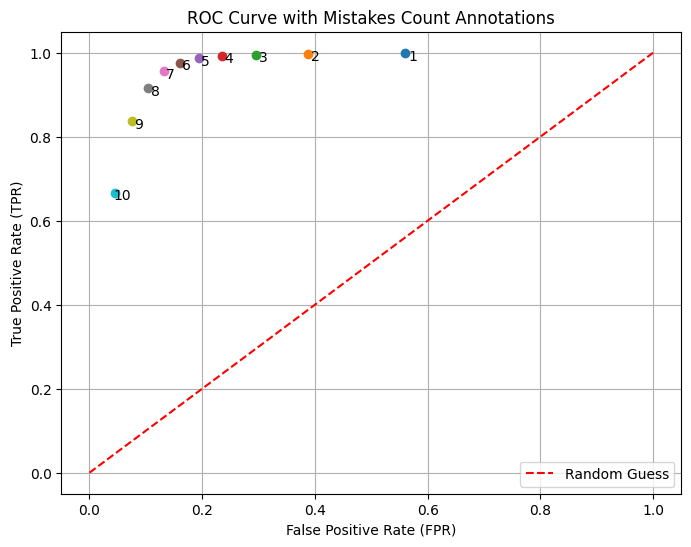

Area Under the Curve (AUC): 0.49907322987450103


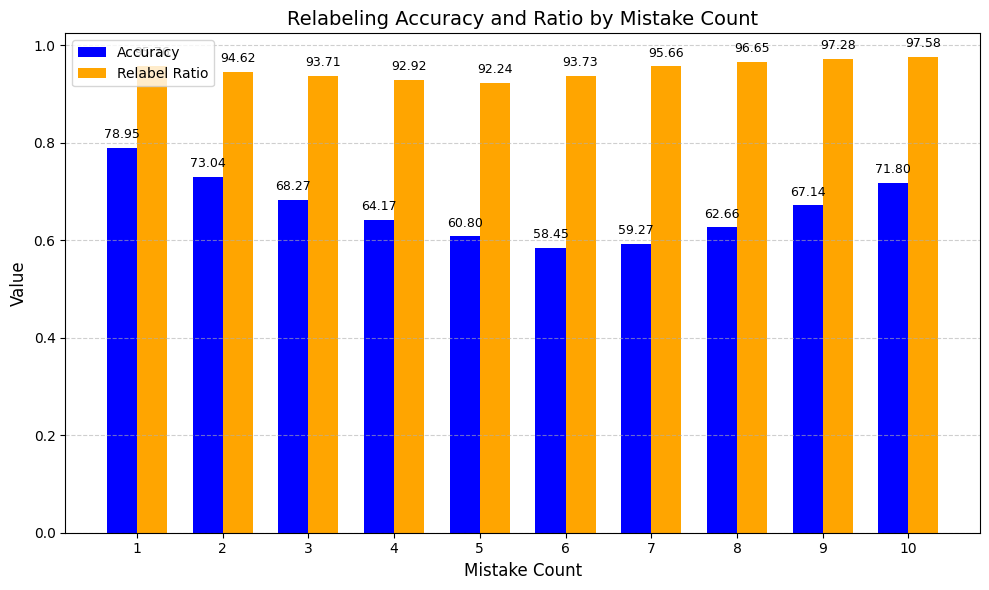

In [4]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.9569    0.9248    0.9406     39792
       Noisy     0.7408    0.8375    0.7862     10208

    accuracy                         0.9070     50000
   macro avg     0.8488    0.8811    0.8634     50000
weighted avg     0.9127    0.9070    0.9090     50000



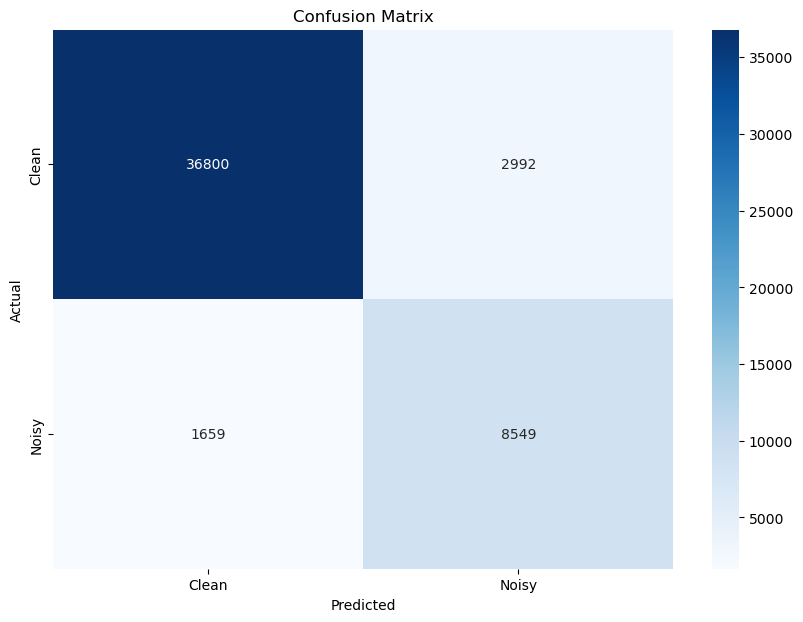

              precision    recall  f1-score   support

       Clean     0.8577    0.9343    0.8944     39792
       Noisy     0.6074    0.3960    0.4794     10208

    accuracy                         0.8244     50000
   macro avg     0.7326    0.6651    0.6869     50000
weighted avg     0.8066    0.8244    0.8097     50000



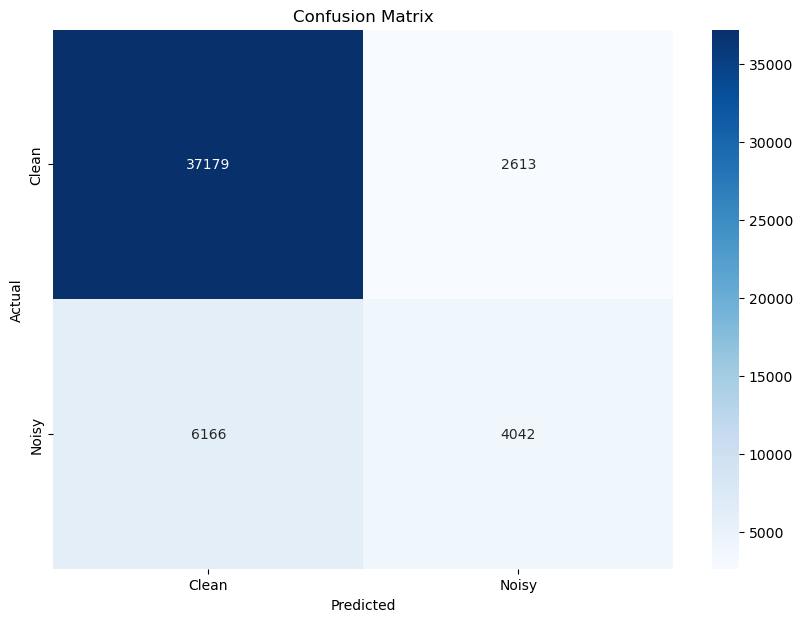

6655 removed from dataset and 4886 relabled
4.90% noise remained in 43345 data


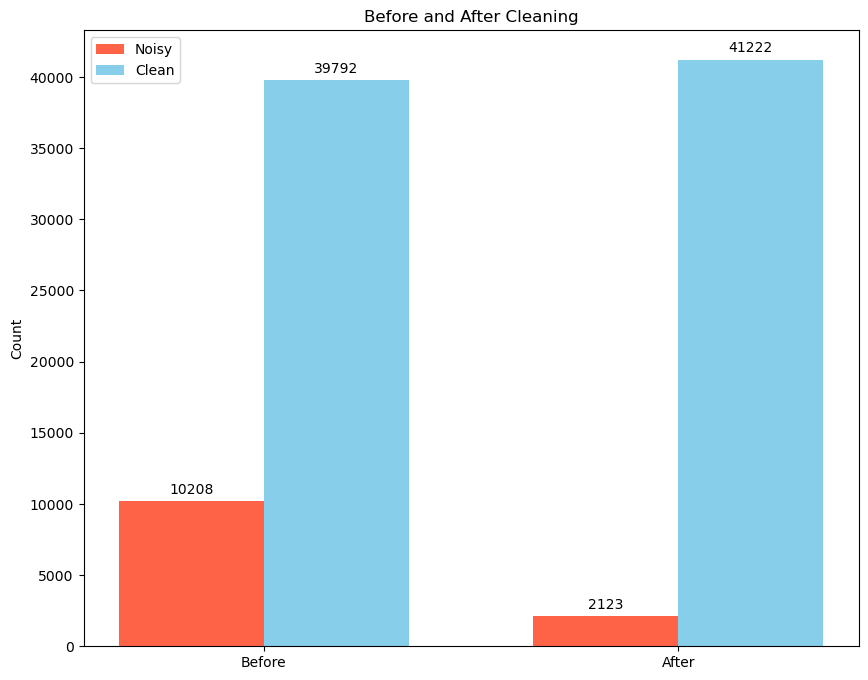

100%|██████████| 43345/43345 [00:01<00:00, 38123.33it/s]

Cleaned dataset saved to cleaned/Advanced-CIFAR10-20.pkl


In [13]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=9, relabel_threshold=10)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10-20')

In [6]:
noise_cleaner.save_cleaned_cifar_dataset('cleaned', 'CIFAR10')

100%|██████████| 41150/41150 [00:01<00:00, 21517.98it/s]

Cleaned dataset saved to cleaned/CIFAR10.pkl


## CIFAR10 - 30

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10(30)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.3, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=10, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10(30)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10(30)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 14976 out of 50000 data


In [3]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
72.09847596717468% accuracy in 853 data
Loaded 853 noisy indices from cifar10(30)/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
74.22434367541766% accuracy in 838 data
Loaded 838 noisy indices from cifar10(30)/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
74.74048442906575% accuracy in 867 data
Loaded 867 noisy indices from cifar10(30)/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
78.2668500687758% accuracy in 727 data
Loaded 727 noisy indices from cifar10(30)/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
74.47306791569088% accuracy in 854 data
Loaded 854 noisy indices from cifar10(30)/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
77.1604938271605% accuracy in 810 data
Loaded 810 noisy indices from cifar10(30)/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
76.58371040723982% accuracy in 884 data
Loaded 884 noisy ind

              precision    recall  f1-score   support

       Clean     0.9119    0.8018    0.8533     35024
       Noisy     0.6386    0.8188    0.7176     14976

    accuracy                         0.8069     50000
   macro avg     0.7752    0.8103    0.7854     50000
weighted avg     0.8300    0.8069    0.8127     50000



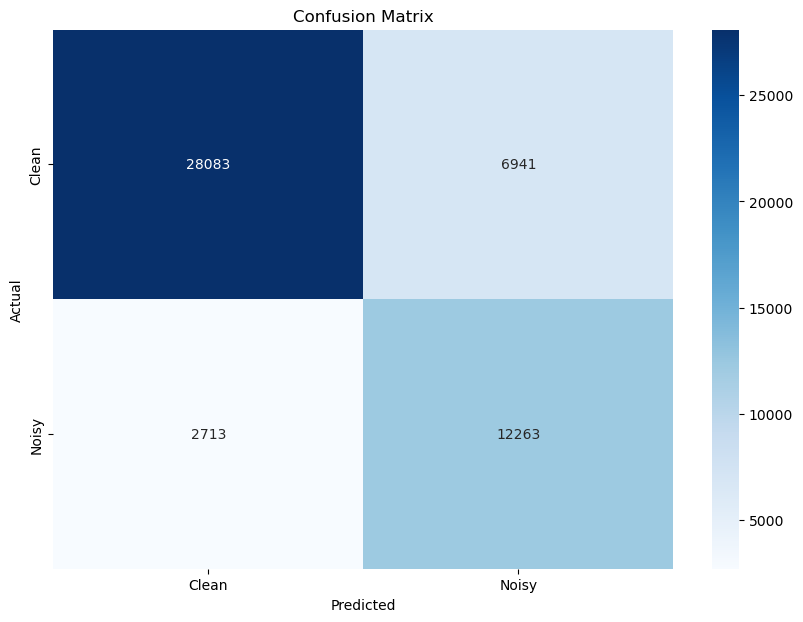

In [8]:
noise_cleaner.report(mistakes_count=7)

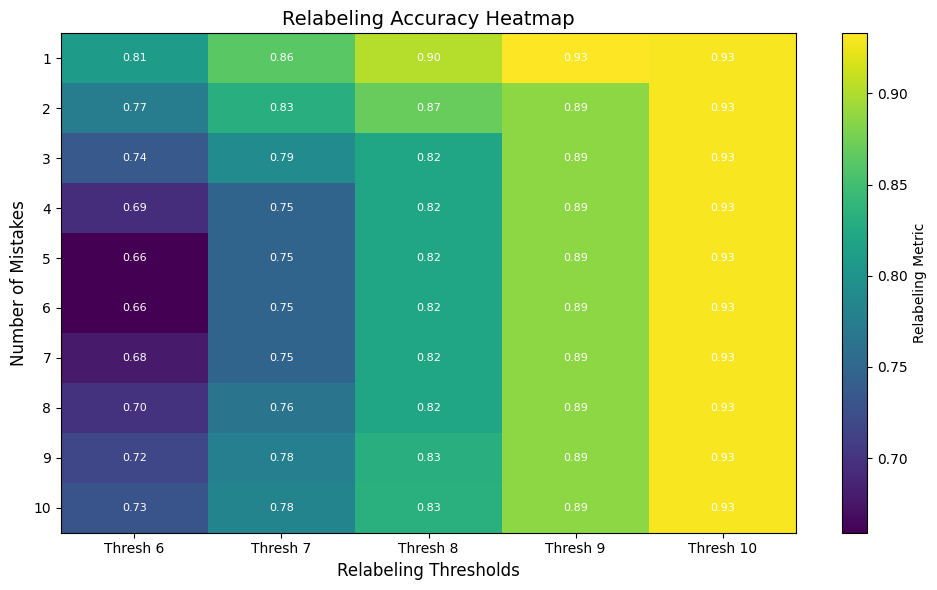

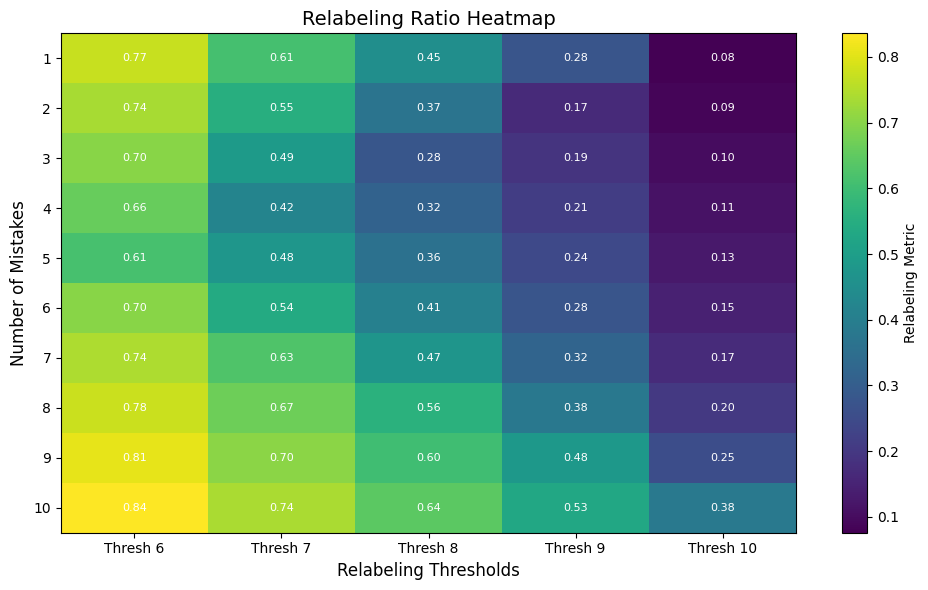

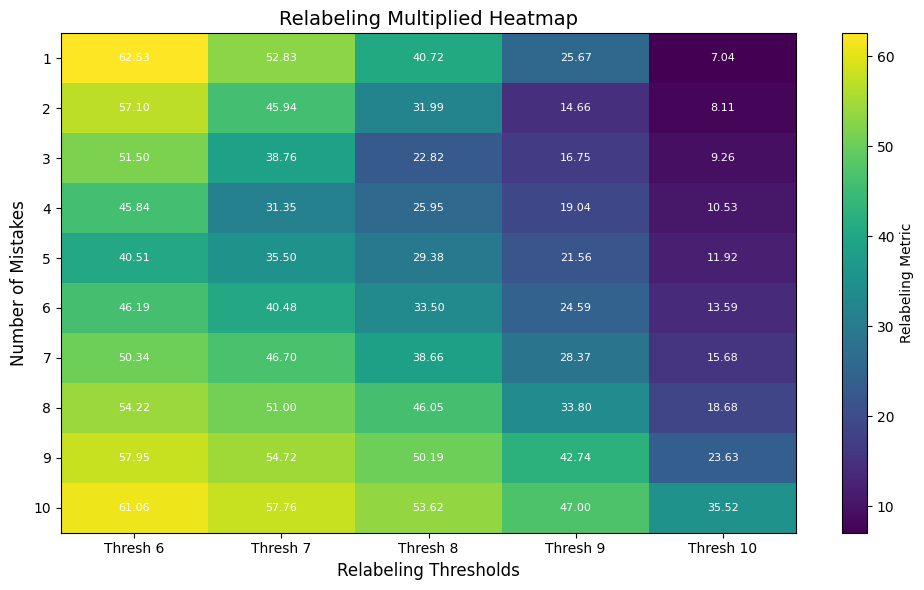

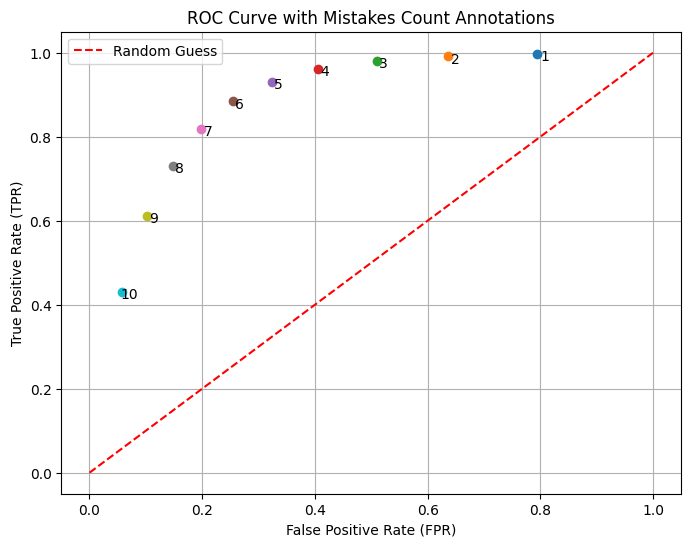

Area Under the Curve (AUC): 0.6646810900562569


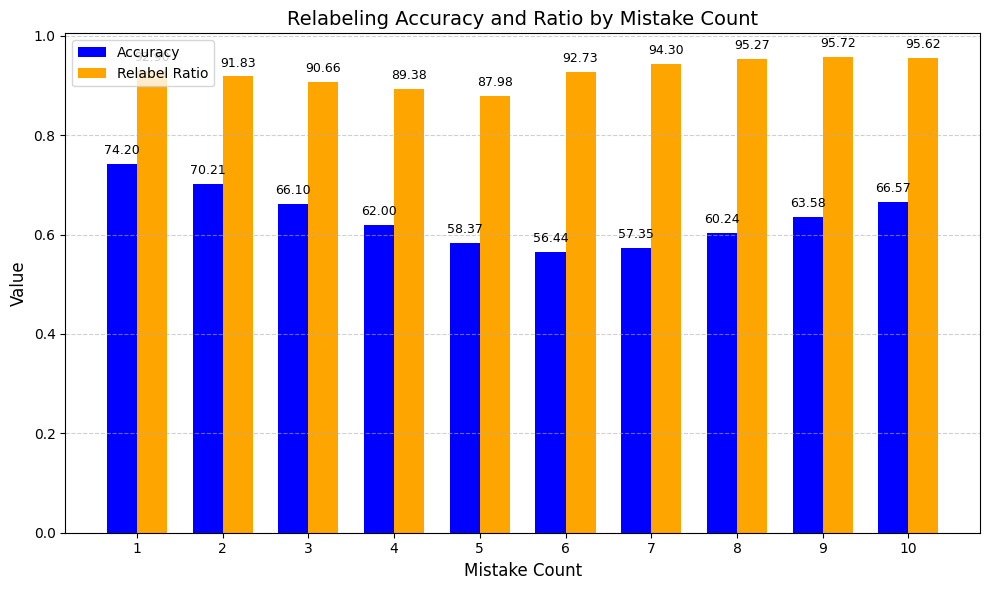

In [4]:
noise_cleaner.analyze()

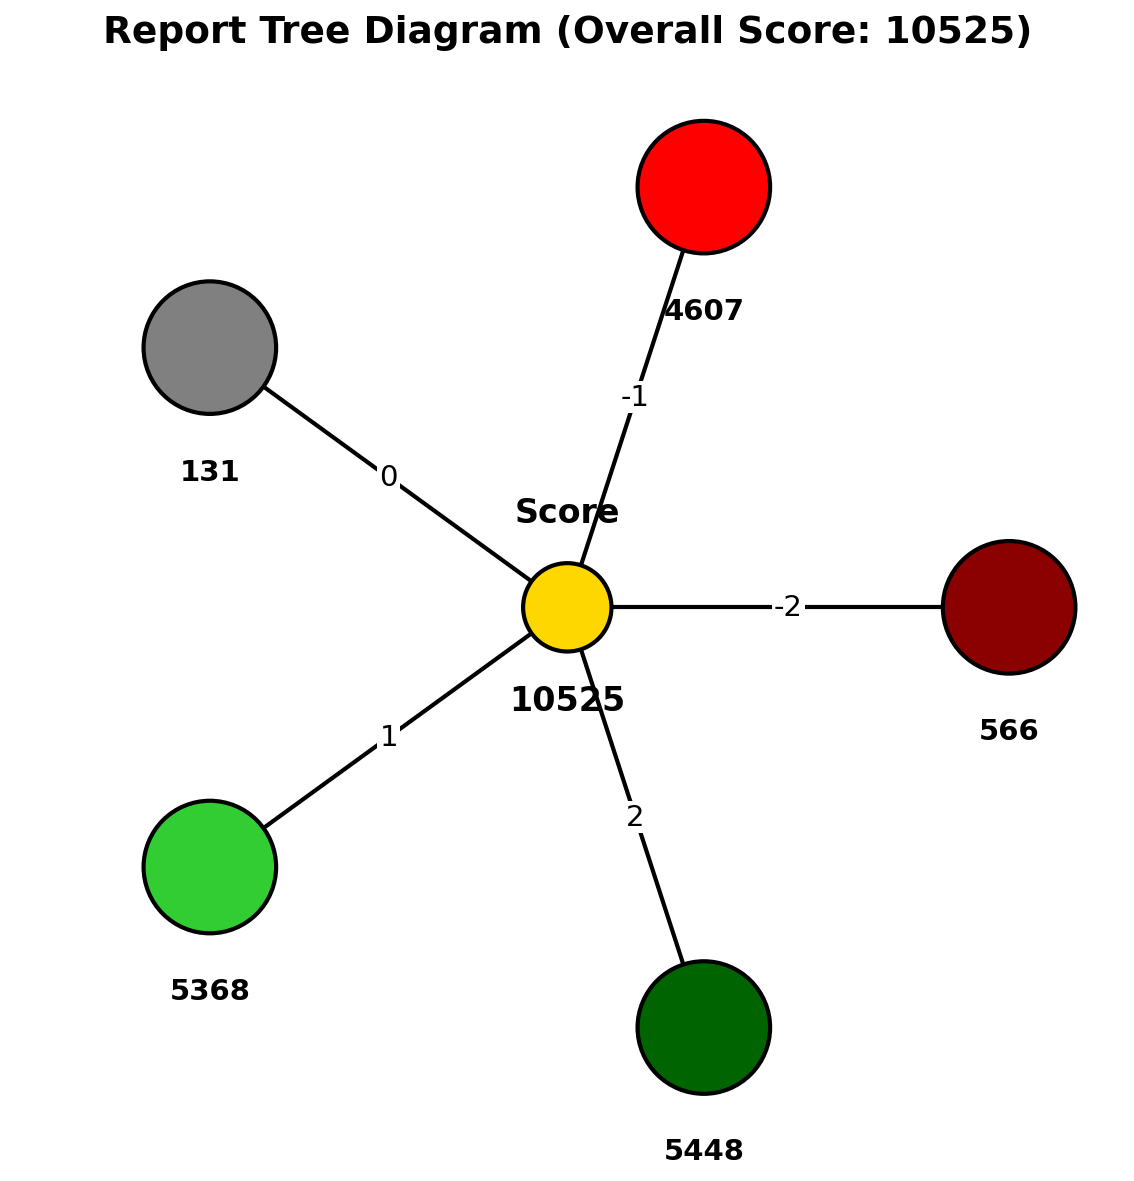

In [17]:
score, relabeling_report = noise_cleaner.calculate_relabeling_score(mistakes_count=8, relabel_threshold=9)

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.9119    0.8018    0.8533     35024
       Noisy     0.6386    0.8188    0.7176     14976

    accuracy                         0.8069     50000
   macro avg     0.7752    0.8103    0.7854     50000
weighted avg     0.8300    0.8069    0.8127     50000



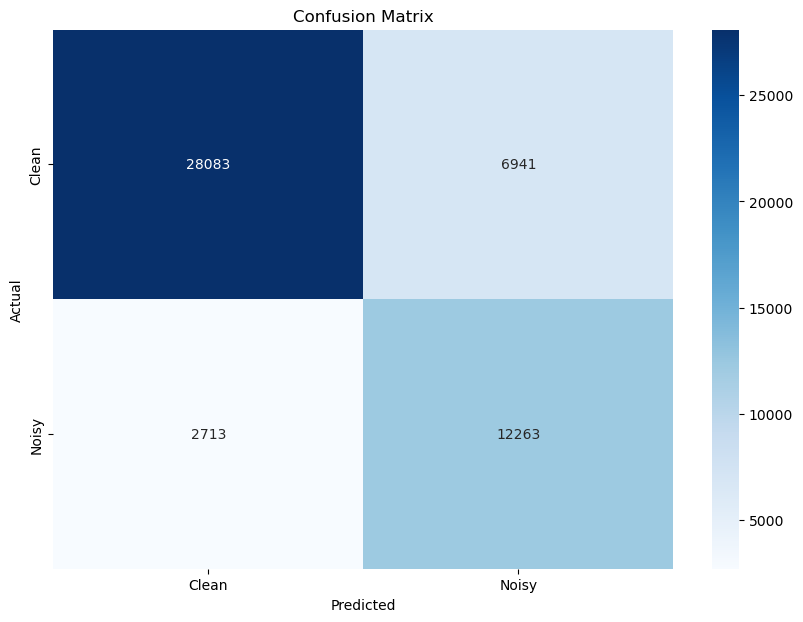

              precision    recall  f1-score   support

       Clean     0.7380    0.8395    0.7855     35024
       Noisy     0.4467    0.3030    0.3610     14976

    accuracy                         0.6788     50000
   macro avg     0.5923    0.5712    0.5733     50000
weighted avg     0.6507    0.6788    0.6584     50000



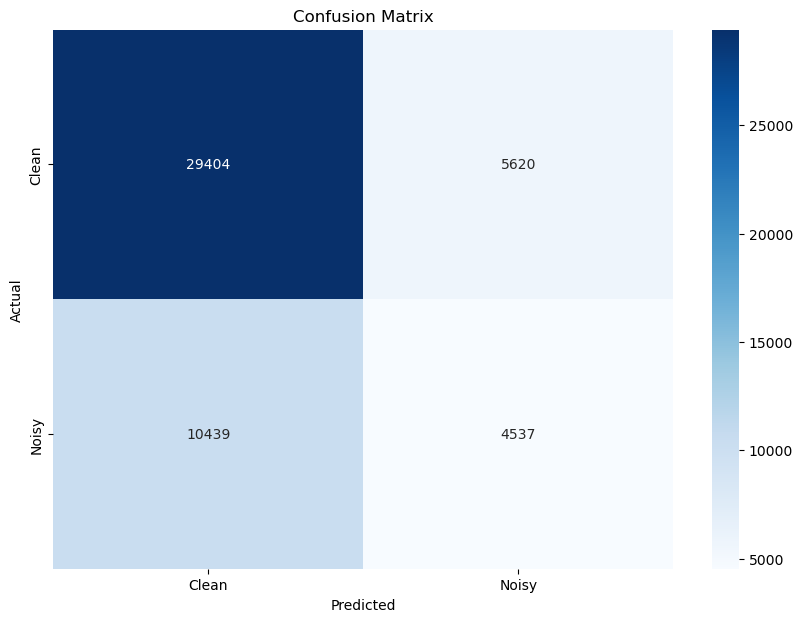

10157 removed from dataset and 9047 relabled
10.88% noise remained in 39843 data


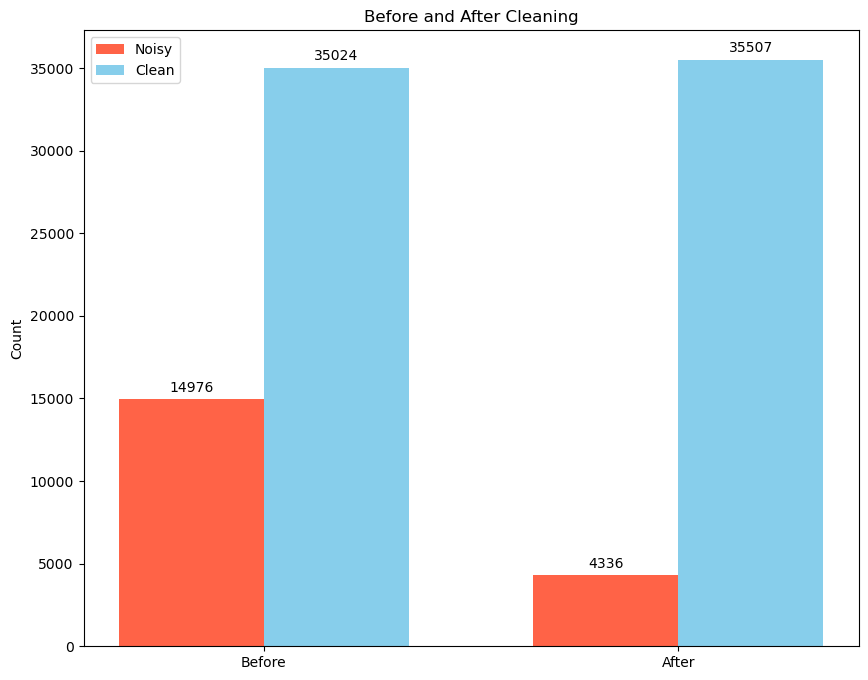

100%|██████████| 39843/39843 [00:01<00:00, 38997.19it/s]

Cleaned dataset saved to cleaned/Advanced-CIFAR10-30.pkl


In [19]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=7, relabel_threshold=8)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10-30')

## CIFAR10 - 40

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10(40)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.4, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=15, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=new_augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10(40)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10(40)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 19803 out of 50000 data


              precision    recall  f1-score   support

       Clean     0.7386    0.5522    0.6319     30197
       Noisy     0.5069    0.7021    0.5887     19803

    accuracy                         0.6115     50000
   macro avg     0.6228    0.6271    0.6103     50000
weighted avg     0.6469    0.6115    0.6148     50000



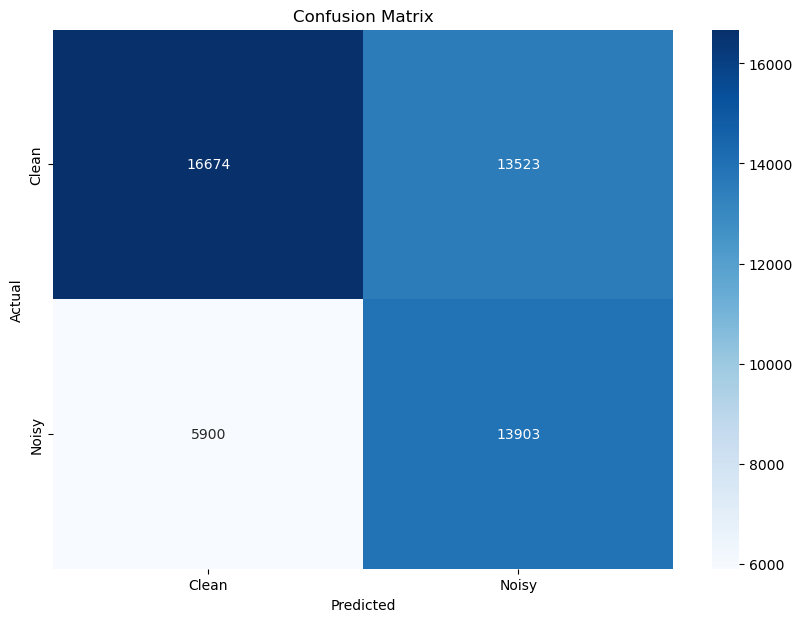

In [29]:
noise_cleaner.report(mistakes_count=6)

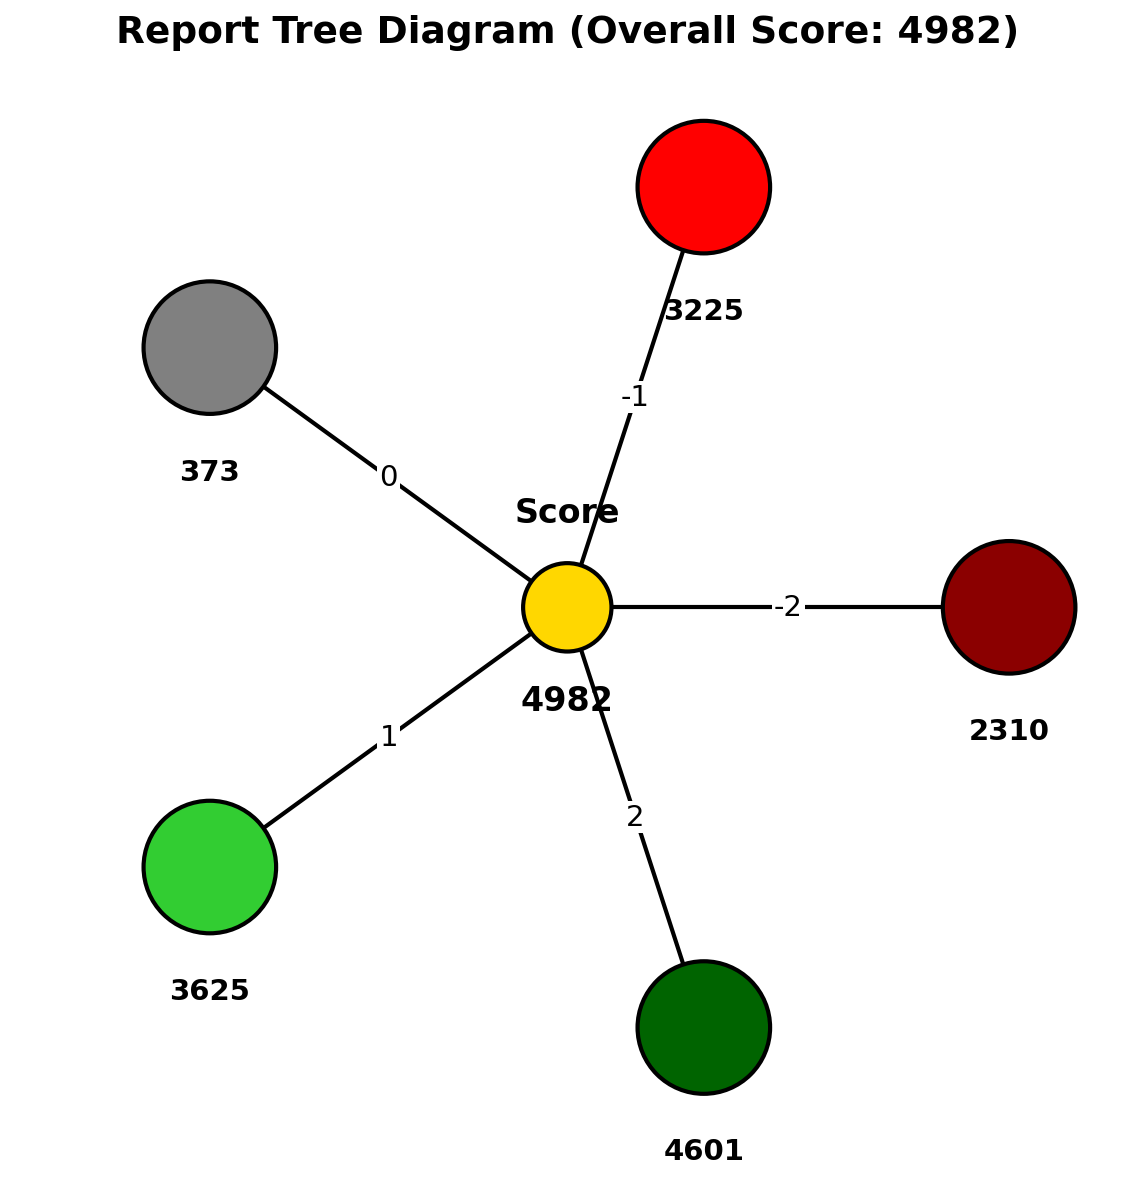

(4982, {'-2': 2310, '-1': 3225, '0': 373, '1': 3625, '2': 4601})

In [18]:
noise_cleaner.calculate_relabeling_score(mistakes_count=9, relabel_threshold=8)

In [3]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
70.13729977116705% accuracy in 874 data
Loaded 874 noisy indices from cifar10(40)/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
63.282937365010795% accuracy in 926 data
Loaded 926 noisy indices from cifar10(40)/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
69.01408450704226% accuracy in 923 data
Loaded 923 noisy indices from cifar10(40)/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
71.32947976878613% accuracy in 865 data
Loaded 865 noisy indices from cifar10(40)/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
67.70114942528735% accuracy in 870 data
Loaded 870 noisy indices from cifar10(40)/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
63.24884792626728% accuracy in 868 data
Loaded 868 noisy indices from cifar10(40)/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
68.40148698884758% accuracy in 807 data
Loaded 807 noisy 

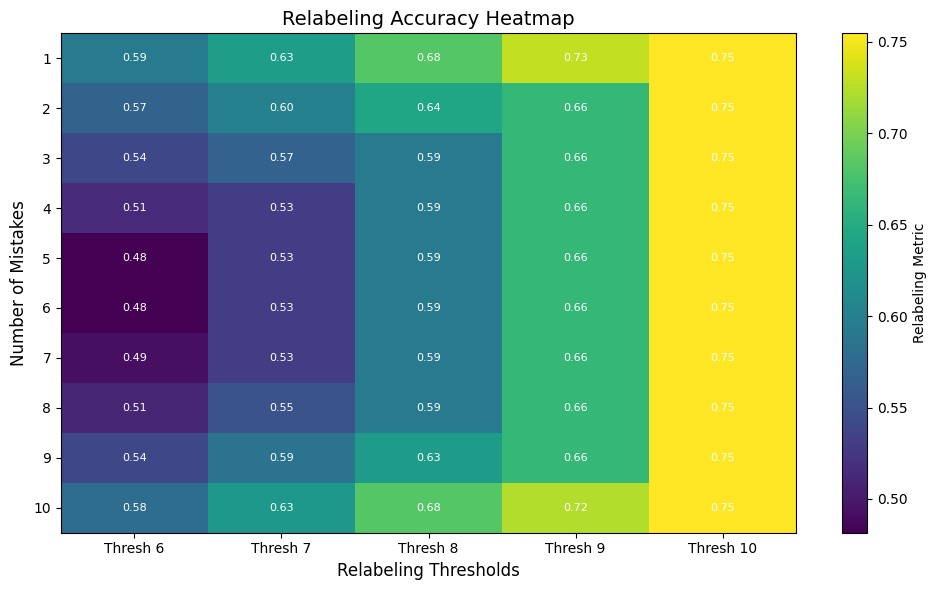

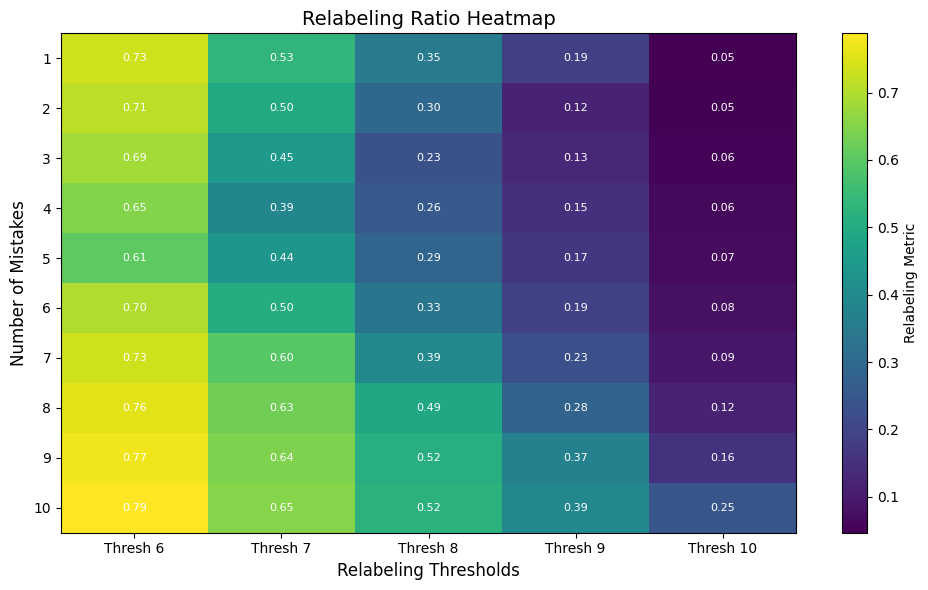

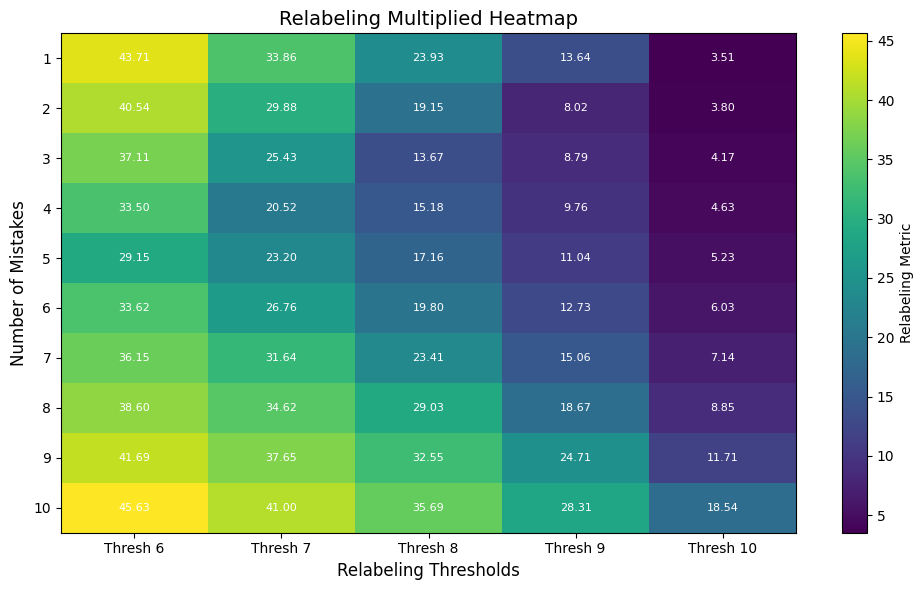

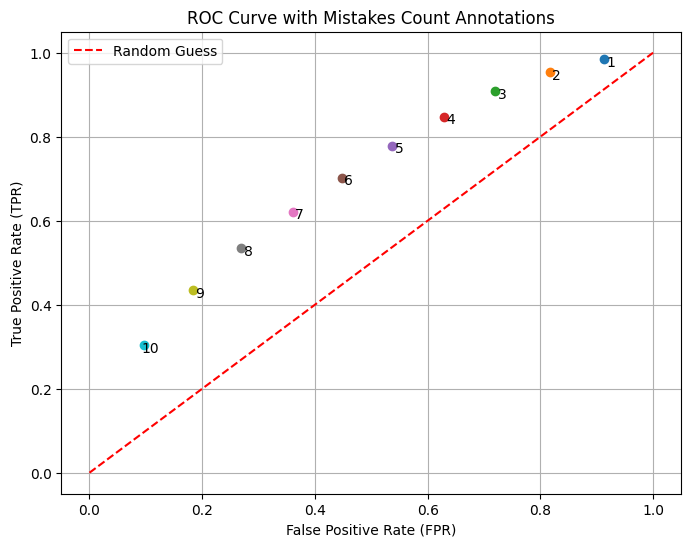

Area Under the Curve (AUC): 0.589056895488616


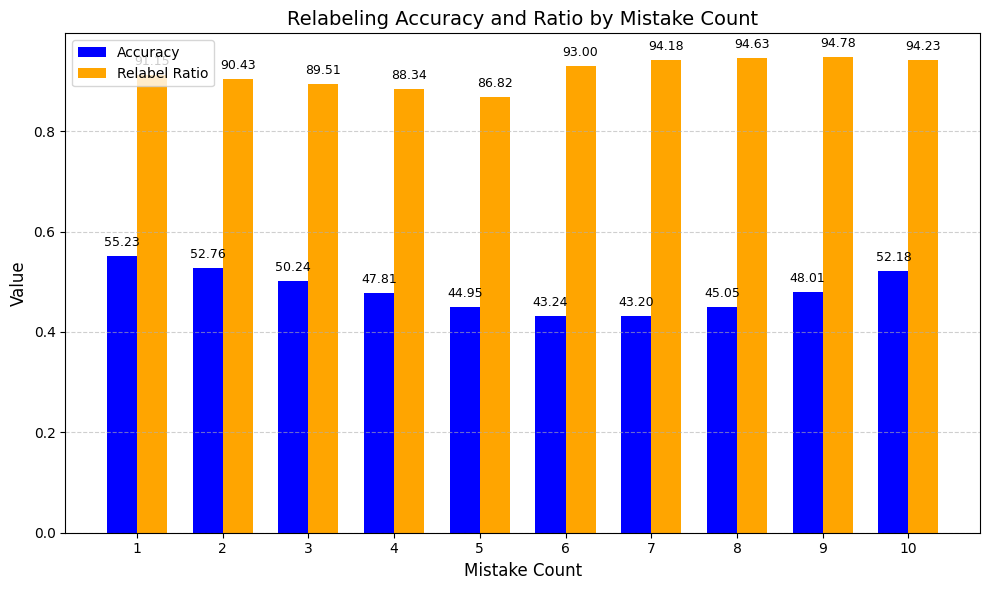

In [4]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.7386    0.5522    0.6319     30197
       Noisy     0.5069    0.7021    0.5887     19803

    accuracy                         0.6115     50000
   macro avg     0.6228    0.6271    0.6103     50000
weighted avg     0.6469    0.6115    0.6148     50000



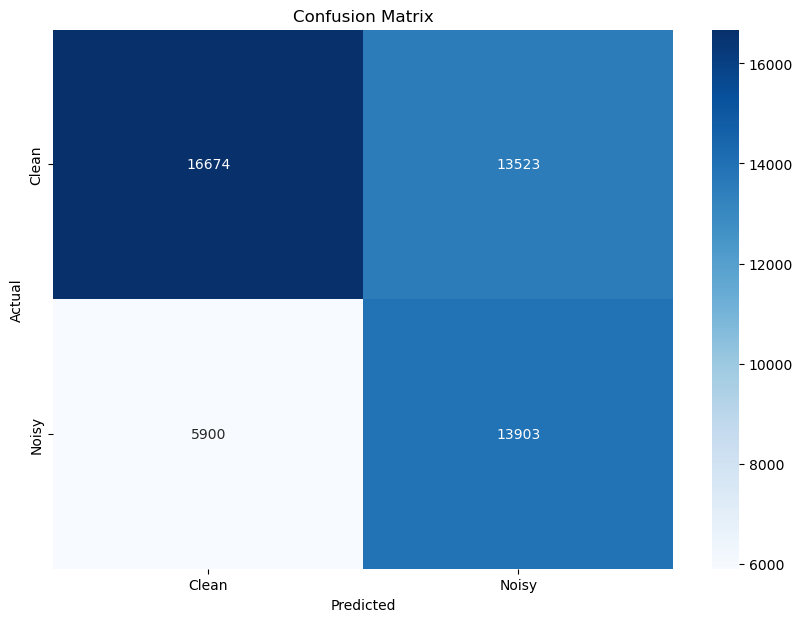

              precision    recall  f1-score   support

       Clean     0.6932    0.5685    0.6247     30197
       Noisy     0.4837    0.6163    0.5420     19803

    accuracy                         0.5874     50000
   macro avg     0.5884    0.5924    0.5833     50000
weighted avg     0.6102    0.5874    0.5919     50000



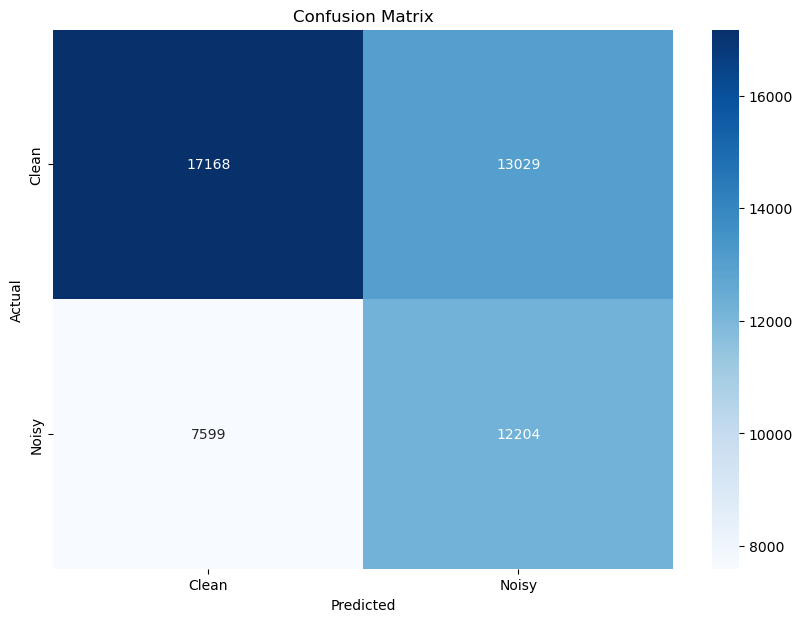

25233 removed from dataset and 2193 relabled
25.99% noise remained in 24767 data


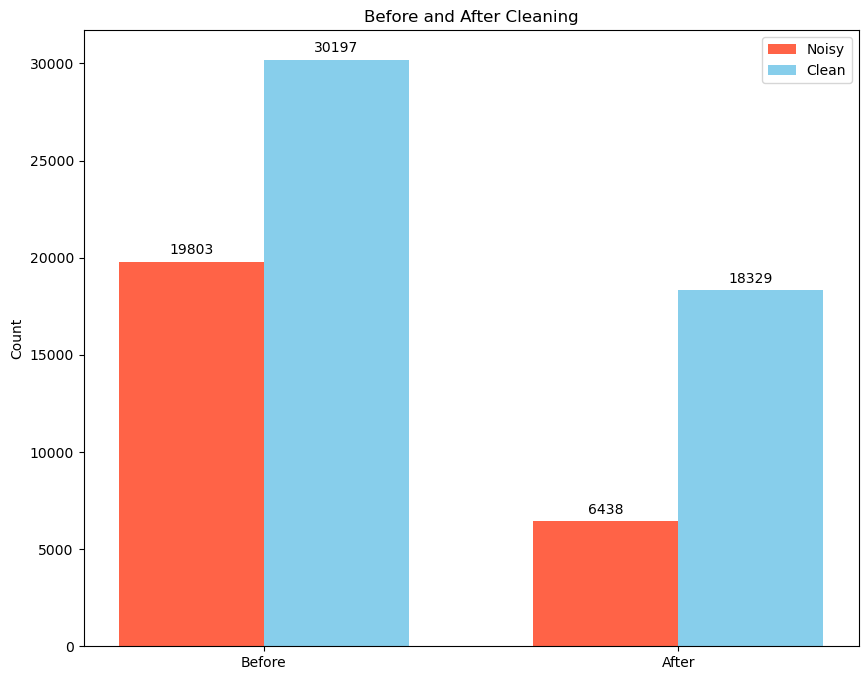

100%|██████████| 24767/24767 [00:00<00:00, 38929.45it/s]

Cleaned dataset saved to cleaned/Advanced-CIFAR10-40.pkl


In [27]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=6, relabel_threshold=10)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10-40')

## CIFAR 100 - 20

In [6]:
train_dataset = CIFAR100(root='data', train=True, download=True)
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # Optional
    transforms.RandAugment(num_ops=2, magnitude=9),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=15, outer_folds_num=15, model='resnet50', train_noise_level=0.2, epochs_num=1000, train_pairs=300000, 
                             val_pairs=30000, embedding_dimension=128, lr=5e-5, optimizer='Adam', patience=15, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.4, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=new_augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=4, freeze_epoch=None, noisy_indices_path='cifar100(128)(20)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar100(128)(20)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(8, 15),
                             num_class=100, siamese_middle_size=100)

Files already downloaded and verified
Seed: 73
noise count: 10180 out of 50000 data


In [3]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
43.688037012557835% accuracy in 1513 data
Loaded 1513 noisy indices from cifar100(128)(20)/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
42.885245901639344% accuracy in 1525 data
Loaded 1525 noisy indices from cifar100(128)(20)/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
45.39473684210527% accuracy in 1520 data
Loaded 1520 noisy indices from cifar100(128)(20)/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
45.38866930171278% accuracy in 1518 data
Loaded 1518 noisy indices from cifar100(128)(20)/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
44.45955132562883% accuracy in 1471 data
Loaded 1471 noisy indices from cifar100(128)(20)/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
45.08361204013378% accuracy in 1495 data
Loaded 1495 noisy indices from cifar100(128)(20)/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
44.06887

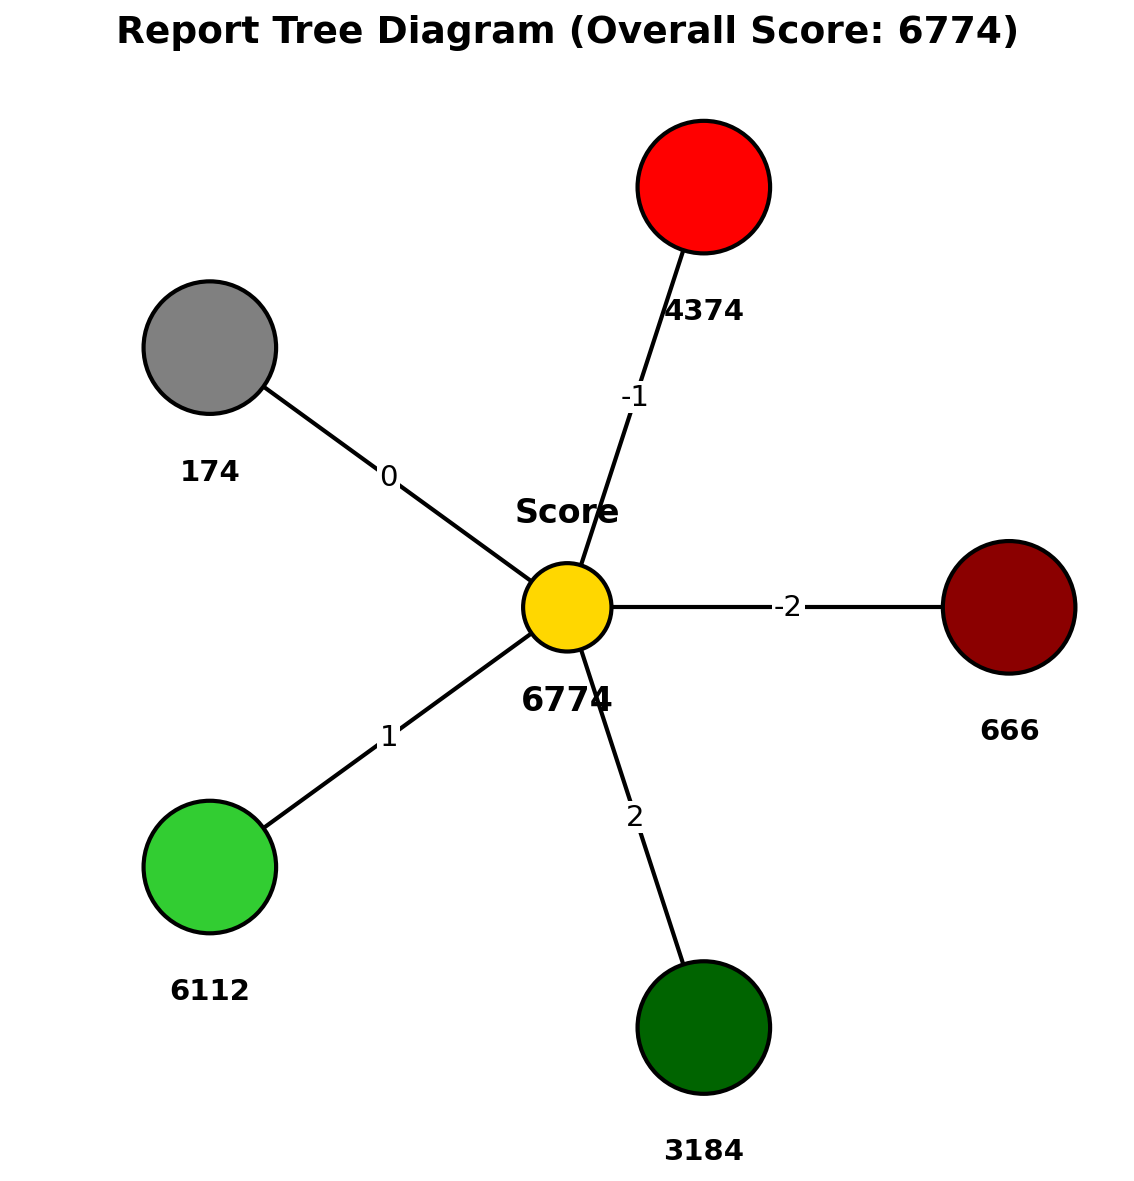

In [11]:
score, relabeling_report = noise_cleaner.calculate_relabeling_score(mistakes_count=15, relabel_threshold=15)

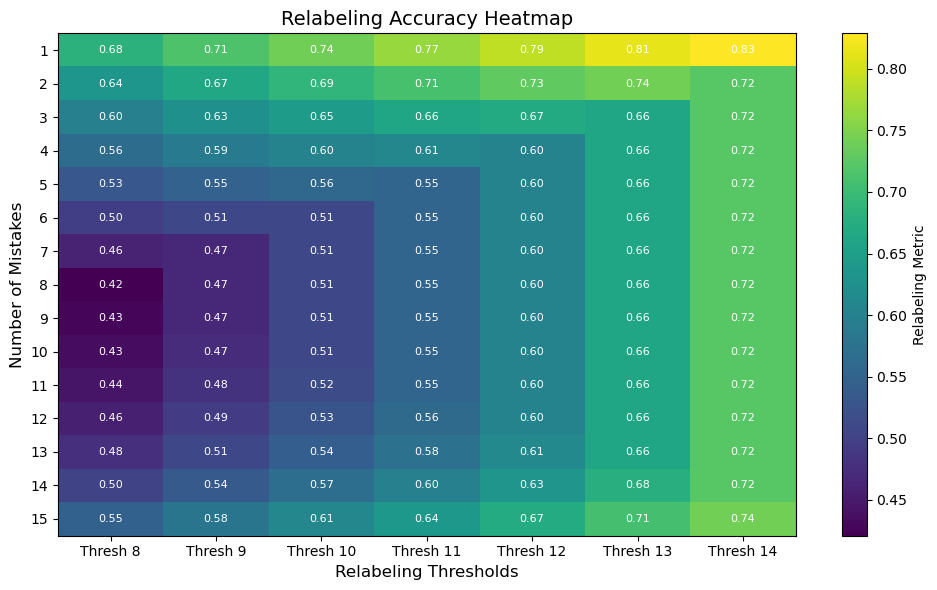

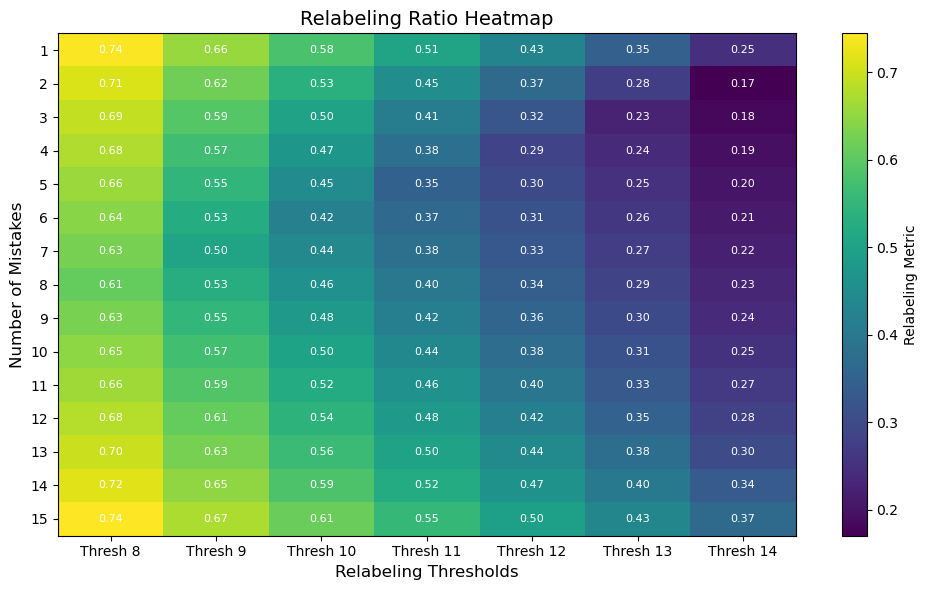

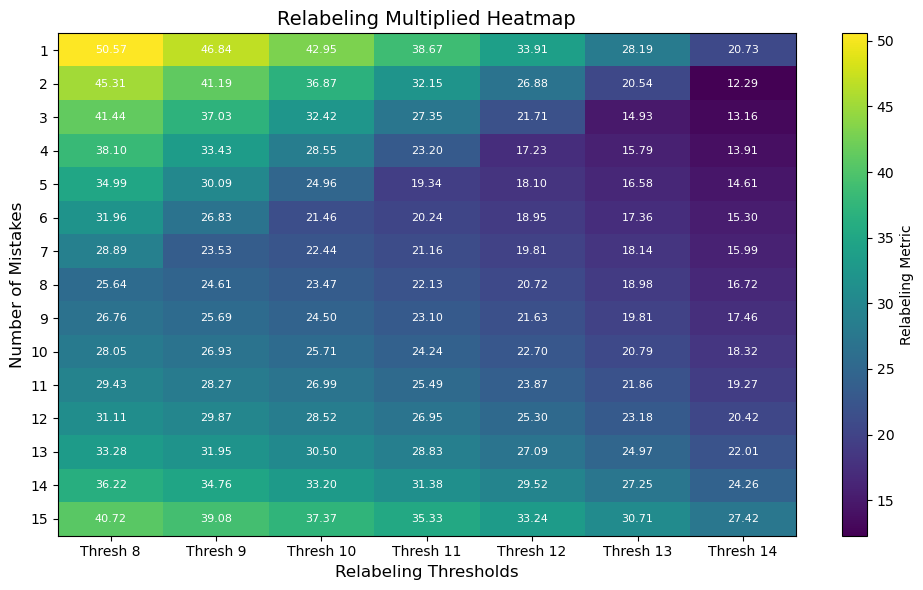

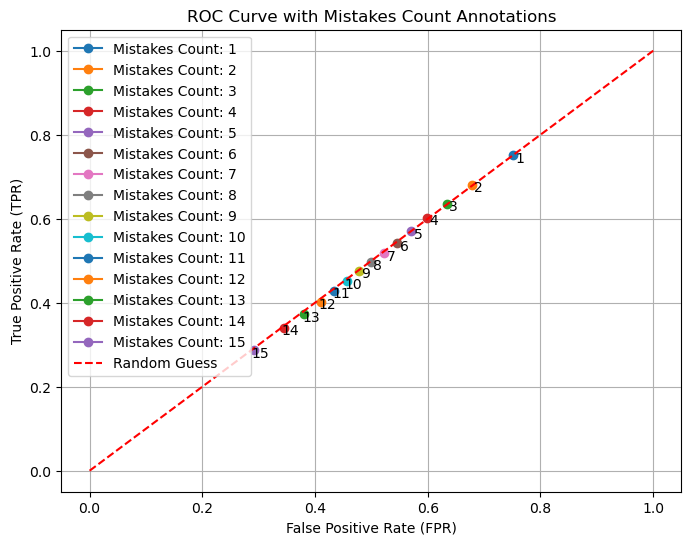

Area Under the Curve (AUC): 0.23858366578878037


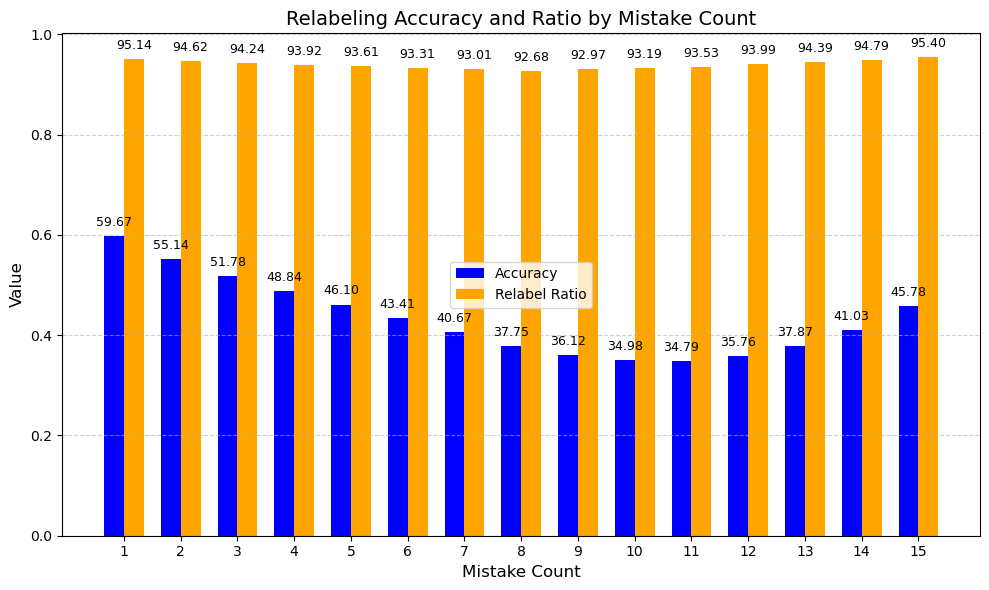

In [7]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.7954    0.7089    0.7497     39820
       Noisy     0.2012    0.2868    0.2365     10180

    accuracy                         0.6230     50000
   macro avg     0.4983    0.4979    0.4931     50000
weighted avg     0.6745    0.6230    0.6452     50000



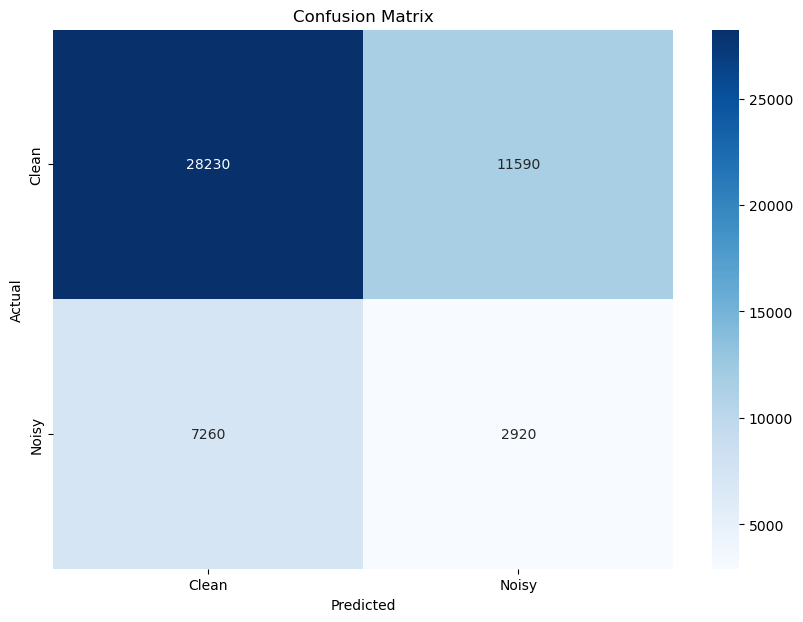

              precision    recall  f1-score   support

       Clean     0.7954    0.7089    0.7497     39820
       Noisy     0.2012    0.2868    0.2365     10180

    accuracy                         0.6230     50000
   macro avg     0.4983    0.4979    0.4931     50000
weighted avg     0.6745    0.6230    0.6452     50000



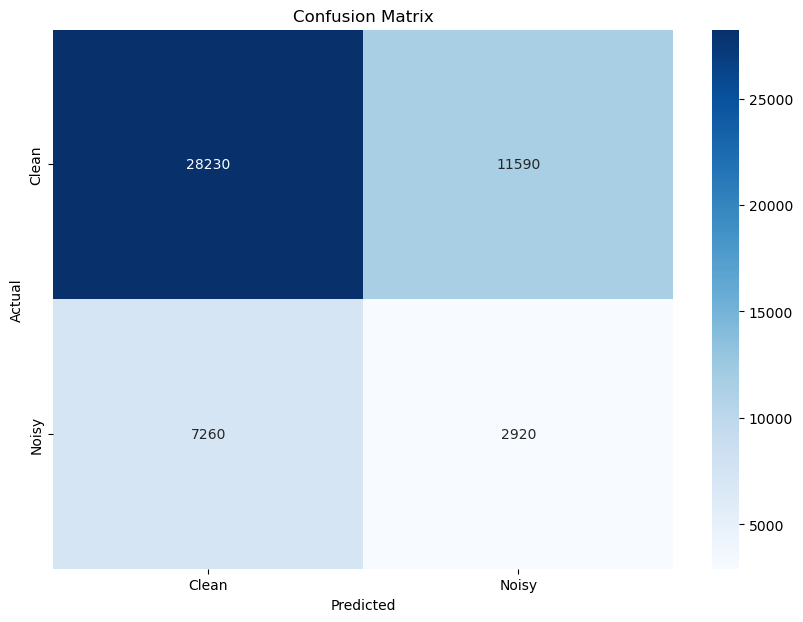

14510 removed from dataset and 0 relabled
20.85% noise remained in 35490 data


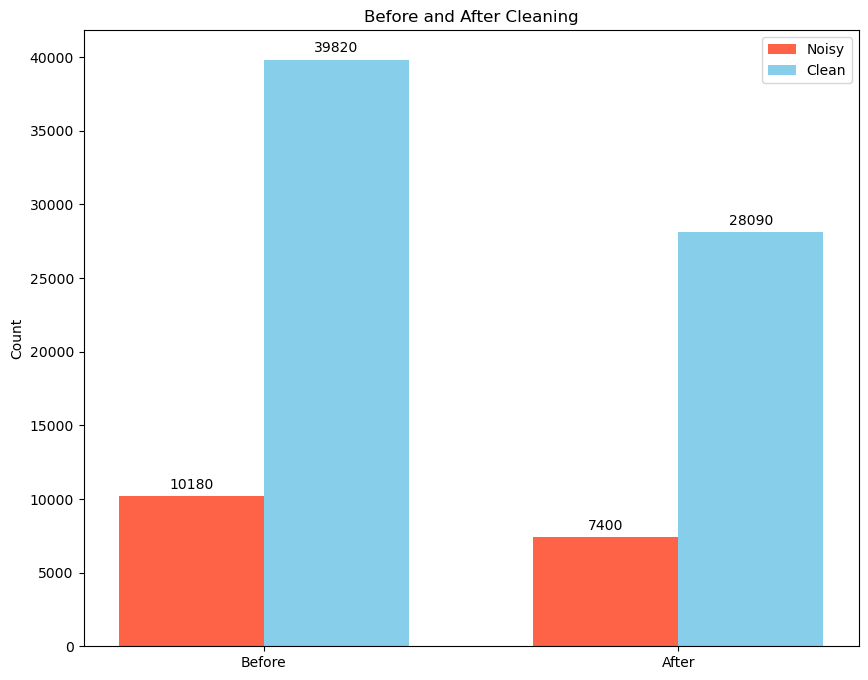

In [10]:
dataset = CIFAR100(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=15, relabel_threshold=-1)

## CIFAR10N

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='cifar10n', model_save_path="cifar10n/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.2, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=8, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=new_augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10n/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10n/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
The overall noise rate is 0.09009999999999996
noise count: 4505 out of 50000 data


Skipping outer fold 1 with results:
68.30985915492957% accuracy in 426 data
Loaded 426 noisy indices from cifar10n/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
68.16143497757847% accuracy in 446 data
Loaded 446 noisy indices from cifar10n/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
71.68141592920354% accuracy in 452 data
Loaded 452 noisy indices from cifar10n/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
73.60178970917227% accuracy in 447 data
Loaded 447 noisy indices from cifar10n/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
69.39252336448598% accuracy in 428 data
Loaded 428 noisy indices from cifar10n/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
73.25581395348837% accuracy in 430 data
Loaded 430 noisy indices from cifar10n/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
70.02237136465325% accuracy in 447 data
Loaded 447 noisy indices from cifar1

Epoch 0/1000:   0%|          | 0/1000 [00:00<?, ?it/s]/usr/lib/python3.13/site-packages/torch/nn/modules/linear.py:125: UserWarning: Attempting to use hipBLASLt on an unsupported architecture! Overriding blas backend to hipblas (Triggered internally at /build/python-pytorch/src/pytorch-rocm/aten/src/ATen/Context.cpp:310.)
  return F.linear(input, self.weight, self.bias)
Epoch 24/1000:   2%|▎         | 25/1000 [42:25<27:34:38, 101.82s/it, val_loss=3.9, val_contrastive=1.51, val_accuracy=78.7, train_loss=3.3, train_contrastive=1.55, best_accuracy=79.8, best_loss=3.89]  


Early stopping triggered
Loading best model from checkpoint...


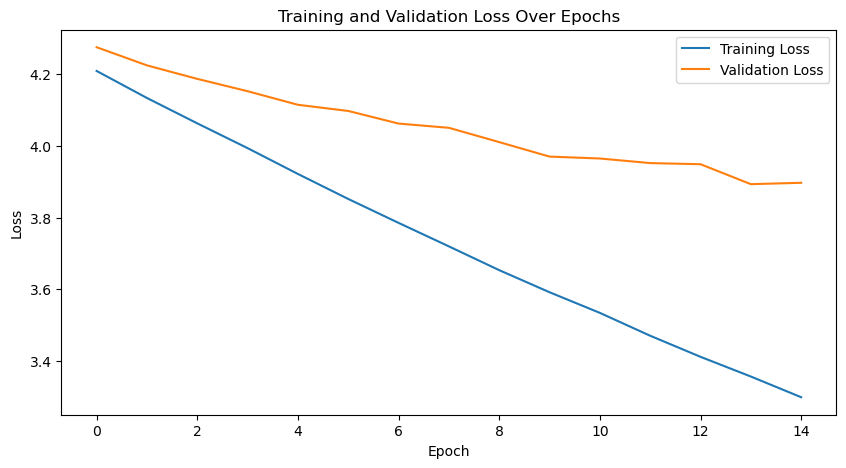

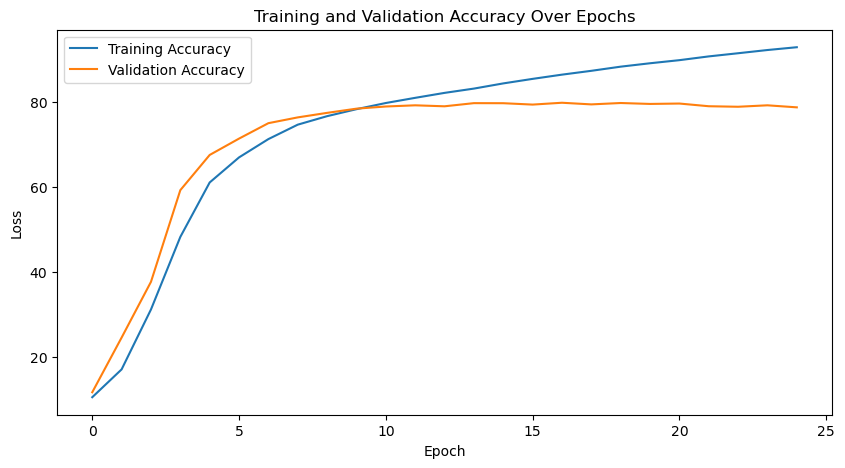

Extracting Embeddings: 100%|██████████| 51/51 [00:01<00:00, 27.03it/s]


Distance between embedding 2878 and 5928: 1.2260
Distance between embedding 2878 and 5875: 1.2723
Distance between embedding 2878 and 5430: 1.4578
Distance between embedding 2878 and 497: 1.3242
Distance between embedding 2878 and 5541: 1.4902
Distance between embedding 2878 and 452: 1.4409
Distance between embedding 2878 and 4213: 1.2274
Distance between embedding 2878 and 2658: 1.3612
Distance between embedding 2878 and 2644: 1.2131
Distance between embedding 2878 and 362: 1.3612
Distance between embedding 2878 and 1669: 1.5708
Distance between embedding 2878 and 542: 1.6570
Distance between embedding 2878 and 4478: 1.1597
Distance between embedding 2878 and 6288: 1.2916
Distance between embedding 2878 and 5071: 1.3620
Distance between embedding 2878 and 3339: 1.4923
Distance between embedding 2878 and 4186: 1.3578
Distance between embedding 2878 and 5732: 1.3270
Distance between embedding 2878 and 5167: 1.6067
Distance between embedding 5928 and 5875: 1.4398
Distance between embeddi

Testing: 100%|██████████| 51/51 [00:01<00:00, 31.59it/s]


Test Accuracy: 79.80%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 32/1000:   3%|▎         | 33/1000 [56:36<27:38:42, 102.92s/it, val_loss=3.84, val_contrastive=1.48, val_accuracy=78.7, train_loss=3.12, train_contrastive=1.49, best_accuracy=80.7, best_loss=3.84]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 21.28it/s]


Test Accuracy: 80.71%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 24/1000:   2%|▎         | 25/1000 [43:07<28:01:38, 103.49s/it, val_loss=3.92, val_contrastive=1.56, val_accuracy=80.1, train_loss=3.48, train_contrastive=1.57, best_accuracy=81.3, best_loss=3.92]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.03it/s]


Test Accuracy: 81.28%
Test Precision: 0.82
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 30/1000:   3%|▎         | 31/1000 [53:44<27:59:47, 104.01s/it, val_loss=3.74, val_contrastive=1.47, val_accuracy=79.1, train_loss=3.02, train_contrastive=1.49, best_accuracy=80.6, best_loss=3.74]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 17.37it/s]


Test Accuracy: 80.65%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 32/1000:   3%|▎         | 33/1000 [57:17<27:58:48, 104.17s/it, val_loss=3.72, val_contrastive=1.47, val_accuracy=79.5, train_loss=3.03, train_contrastive=1.48, best_accuracy=81.5, best_loss=3.72]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:03<00:00, 16.63it/s]


Test Accuracy: 81.53%
Test Precision: 0.82
Test Recall: 0.82
Test F1 Score: 0.82
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 27/1000:   3%|▎         | 28/1000 [48:41<28:10:08, 104.33s/it, val_loss=3.8, val_contrastive=1.48, val_accuracy=79.6, train_loss=3.16, train_contrastive=1.52, best_accuracy=81, best_loss=3.8]    


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:03<00:00, 16.63it/s]


Test Accuracy: 81.05%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 24/1000:   2%|▎         | 25/1000 [43:32<28:17:53, 104.49s/it, val_loss=4.05, val_contrastive=1.54, val_accuracy=78.9, train_loss=3.53, train_contrastive=1.57, best_accuracy=80.2, best_loss=4.05]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:03<00:00, 16.59it/s]


Test Accuracy: 80.20%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 28/1000:   3%|▎         | 29/1000 [50:33<28:12:34, 104.59s/it, val_loss=3.88, val_contrastive=1.47, val_accuracy=78.6, train_loss=3.14, train_contrastive=1.53, best_accuracy=80, best_loss=3.88]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:03<00:00, 16.26it/s]


Test Accuracy: 80.00%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 25/1000:   3%|▎         | 26/1000 [45:15<28:15:10, 104.43s/it, val_loss=3.93, val_contrastive=1.51, val_accuracy=79.8, train_loss=3.39, train_contrastive=1.56, best_accuracy=79.9, best_loss=3.93]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:03<00:00, 16.61it/s]


Test Accuracy: 79.90%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 30/1000:   3%|▎         | 31/1000 [53:54<28:04:58, 104.33s/it, val_loss=3.95, val_contrastive=1.52, val_accuracy=79.7, train_loss=3.3, train_contrastive=1.55, best_accuracy=81.4, best_loss=3.95] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:03<00:00, 16.58it/s]


Test Accuracy: 81.37%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10


Evaluating Noisy Samples: 100%|██████████| 10/10 [00:13<00:00,  1.36s/it]


59.854014598540154% relabeling accuracy


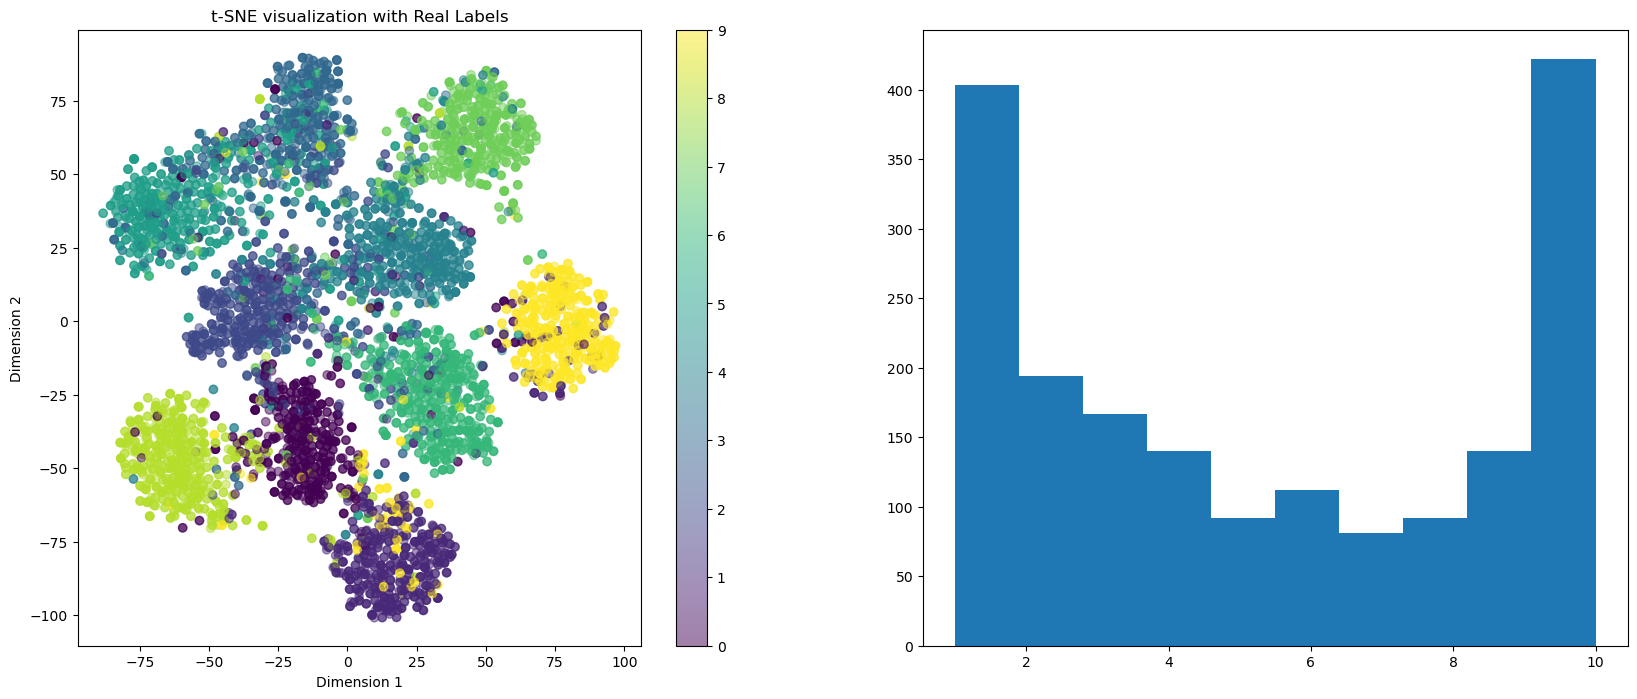

Predicted noise indices: [np.int64(469), np.int64(517), np.int64(649), np.int64(685), np.int64(729), np.int64(814), np.int64(820), np.int64(878), np.int64(1010), np.int64(1055), np.int64(1126), np.int64(1289), np.int64(1703), np.int64(1786), np.int64(2162), np.int64(2183), np.int64(2316), np.int64(2320), np.int64(2384), np.int64(2487), np.int64(2508), np.int64(2567), np.int64(2568), np.int64(2704), np.int64(2725), np.int64(2825), np.int64(2846), np.int64(2848), np.int64(2878), np.int64(2944), np.int64(2947), np.int64(3214), np.int64(3396), np.int64(3402), np.int64(3453), np.int64(3606), np.int64(3667), np.int64(3703), np.int64(4081), np.int64(4214), np.int64(4245), np.int64(4280), np.int64(4341), np.int64(4489), np.int64(4648), np.int64(4660), np.int64(4671), np.int64(4733), np.int64(4741), np.int64(4778), np.int64(4865), np.int64(4888), np.int64(4921), np.int64(5083), np.int64(5096), np.int64(5440), np.int64(5497), np.int64(5519), np.int64(5626), np.int64(5873), np.int64(5898), np.int

Epoch 28/1000:   3%|▎         | 29/1000 [50:52<28:23:09, 105.24s/it, val_loss=3.77, val_contrastive=1.46, val_accuracy=80.3, train_loss=3.07, train_contrastive=1.49, best_accuracy=81.6, best_loss=3.77]

Early stopping triggered
Loading best model from checkpoint...


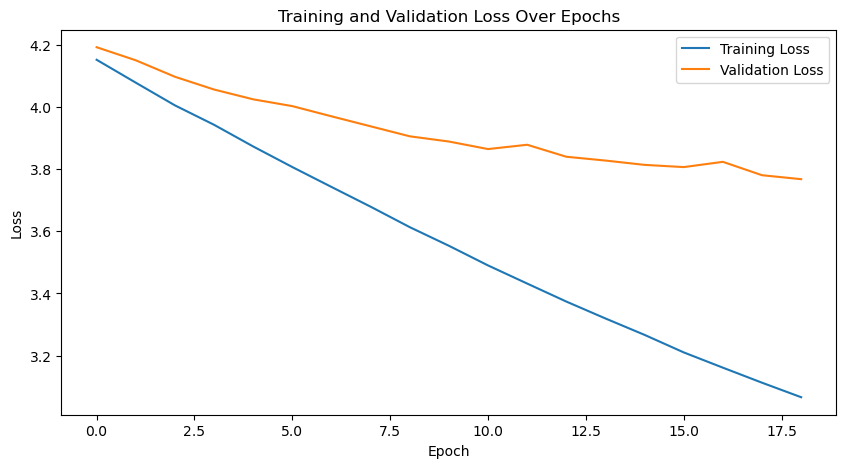

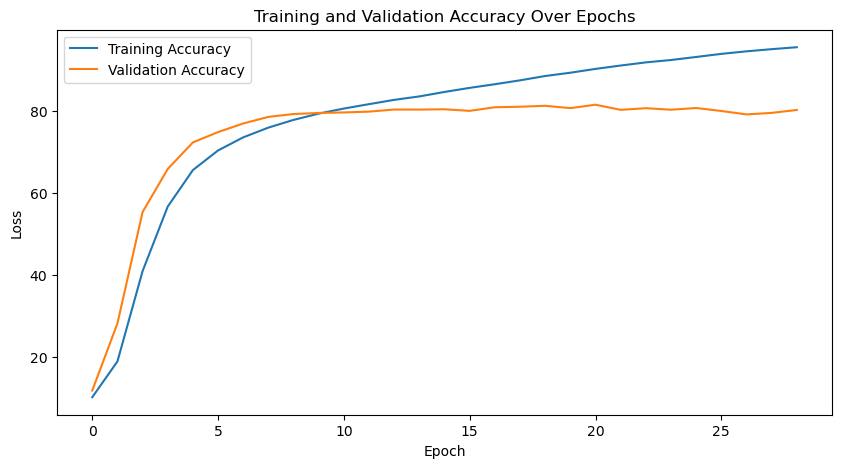

Extracting Embeddings: 100%|██████████| 51/51 [00:03<00:00, 13.80it/s]


Distance between embedding 1469 and 3686: 1.1679
Distance between embedding 1469 and 1039: 1.4684
Distance between embedding 1469 and 4697: 1.4133
Distance between embedding 1469 and 2955: 1.3630
Distance between embedding 1469 and 3794: 1.3894
Distance between embedding 1469 and 6269: 1.4265
Distance between embedding 1469 and 5243: 1.3402
Distance between embedding 1469 and 1286: 1.3613
Distance between embedding 1469 and 3748: 1.3246
Distance between embedding 1469 and 4039: 1.2088
Distance between embedding 1469 and 2251: 1.3982
Distance between embedding 1469 and 3855: 1.4509
Distance between embedding 1469 and 5614: 1.0430
Distance between embedding 1469 and 676: 1.4416
Distance between embedding 1469 and 1456: 1.2709
Distance between embedding 1469 and 2271: 1.4072
Distance between embedding 1469 and 2672: 1.3406
Distance between embedding 1469 and 5551: 1.4776
Distance between embedding 1469 and 1272: 1.3162
Distance between embedding 3686 and 1039: 1.4764
Distance between embe

Testing: 100%|██████████| 51/51 [00:03<00:00, 15.01it/s]


Test Accuracy: 81.57%
Test Precision: 0.82
Test Recall: 0.82
Test F1 Score: 0.82
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 25/1000:   3%|▎         | 26/1000 [46:01<28:43:59, 106.20s/it, val_loss=3.95, val_contrastive=1.55, val_accuracy=80.7, train_loss=3.5, train_contrastive=1.56, best_accuracy=81.4, best_loss=3.95] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:03<00:00, 12.86it/s]


Test Accuracy: 81.37%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 23/1000:   2%|▏         | 24/1000 [42:58<29:07:34, 107.43s/it, val_loss=3.99, val_contrastive=1.53, val_accuracy=80.6, train_loss=3.55, train_contrastive=1.56, best_accuracy=82.2, best_loss=3.98]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:04<00:00, 11.35it/s]


Test Accuracy: 82.16%
Test Precision: 0.82
Test Recall: 0.82
Test F1 Score: 0.82
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 26/1000:   3%|▎         | 27/1000 [48:33<29:09:39, 107.89s/it, val_loss=3.86, val_contrastive=1.57, val_accuracy=81.8, train_loss=3.46, train_contrastive=1.56, best_accuracy=82.9, best_loss=3.86]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:04<00:00, 11.52it/s]


Test Accuracy: 82.86%
Test Precision: 0.83
Test Recall: 0.83
Test F1 Score: 0.83
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 25/1000:   3%|▎         | 26/1000 [46:43<29:10:19, 107.82s/it, val_loss=3.8, val_contrastive=1.53, val_accuracy=80.5, train_loss=3.31, train_contrastive=1.55, best_accuracy=81.6, best_loss=3.8]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:04<00:00, 11.46it/s]


Test Accuracy: 81.64%
Test Precision: 0.82
Test Recall: 0.82
Test F1 Score: 0.82
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 31/1000:   3%|▎         | 32/1000 [57:32<29:00:27, 107.88s/it, val_loss=3.86, val_contrastive=1.51, val_accuracy=79.9, train_loss=3.15, train_contrastive=1.5, best_accuracy=80.6, best_loss=3.86] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:04<00:00, 11.32it/s]


Test Accuracy: 80.60%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 22/1000:   2%|▏         | 23/1000 [41:24<29:19:05, 108.03s/it, val_loss=3.84, val_contrastive=1.53, val_accuracy=80.5, train_loss=3.38, train_contrastive=1.55, best_accuracy=80.8, best_loss=3.84]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:04<00:00, 11.17it/s]


Test Accuracy: 80.75%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 33/1000:   3%|▎         | 34/1000 [1:00:59<28:53:03, 107.64s/it, val_loss=3.9, val_contrastive=1.47, val_accuracy=78.6, train_loss=3.17, train_contrastive=1.5, best_accuracy=80.3, best_loss=3.9] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:04<00:00, 10.83it/s]


Test Accuracy: 80.29%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 22/1000:   2%|▏         | 23/1000 [41:22<29:17:34, 107.94s/it, val_loss=3.98, val_contrastive=1.56, val_accuracy=79.2, train_loss=3.57, train_contrastive=1.54, best_accuracy=79.6, best_loss=3.98]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:04<00:00, 11.26it/s]


Test Accuracy: 79.56%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.79
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 22/1000:   2%|▏         | 23/1000 [41:23<29:18:21, 107.99s/it, val_loss=3.83, val_contrastive=1.53, val_accuracy=80.4, train_loss=3.33, train_contrastive=1.54, best_accuracy=80.4, best_loss=3.83]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:04<00:00, 10.58it/s]


Test Accuracy: 80.40%
Test Precision: 0.81
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10


Evaluating Noisy Samples: 100%|██████████| 10/10 [00:13<00:00,  1.34s/it]


59.958071278826% relabeling accuracy


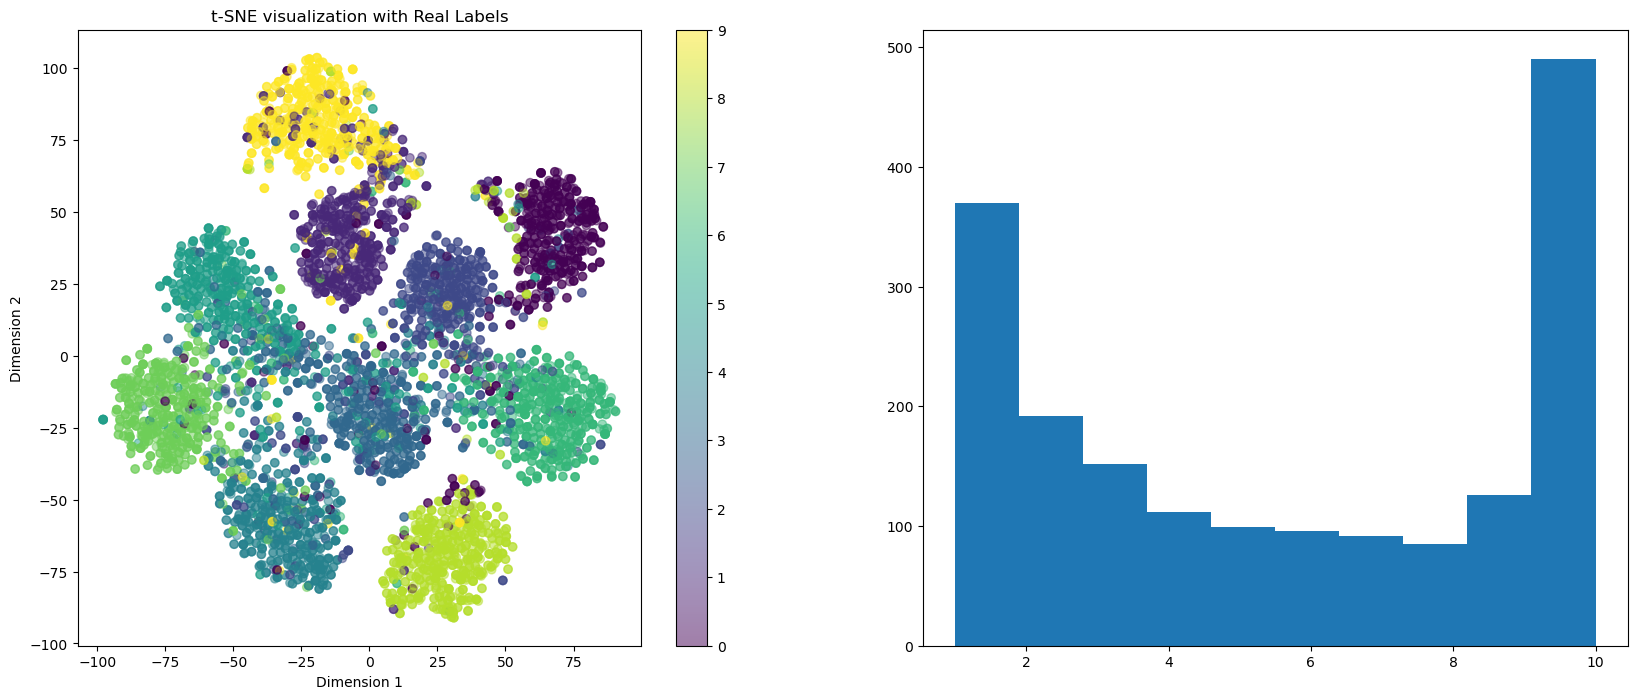

Predicted noise indices: [np.int64(134), np.int64(248), np.int64(428), np.int64(651), np.int64(862), np.int64(988), np.int64(1038), np.int64(1241), np.int64(1352), np.int64(1580), np.int64(1587), np.int64(1618), np.int64(1643), np.int64(1654), np.int64(1655), np.int64(1810), np.int64(1992), np.int64(2056), np.int64(2083), np.int64(2140), np.int64(2278), np.int64(2335), np.int64(2340), np.int64(2555), np.int64(2705), np.int64(3048), np.int64(3218), np.int64(3287), np.int64(3288), np.int64(3582), np.int64(3649), np.int64(3759), np.int64(3787), np.int64(3846), np.int64(3913), np.int64(4013), np.int64(4072), np.int64(4132), np.int64(4145), np.int64(4306), np.int64(4924), np.int64(5267), np.int64(5308), np.int64(5558), np.int64(5618), np.int64(5625), np.int64(5677), np.int64(5778), np.int64(5823), np.int64(5851), np.int64(6119), np.int64(6210), np.int64(6301), np.int64(6359), np.int64(6493), np.int64(6533), np.int64(6585), np.int64(6611), np.int64(6710), np.int64(6879), np.int64(6914), np.i

Epoch 23/1000:   2%|▏         | 24/1000 [43:40<29:35:47, 109.17s/it, val_loss=3.91, val_contrastive=1.55, val_accuracy=79.4, train_loss=3.37, train_contrastive=1.56, best_accuracy=81, best_loss=3.91]  

Early stopping triggered
Loading best model from checkpoint...


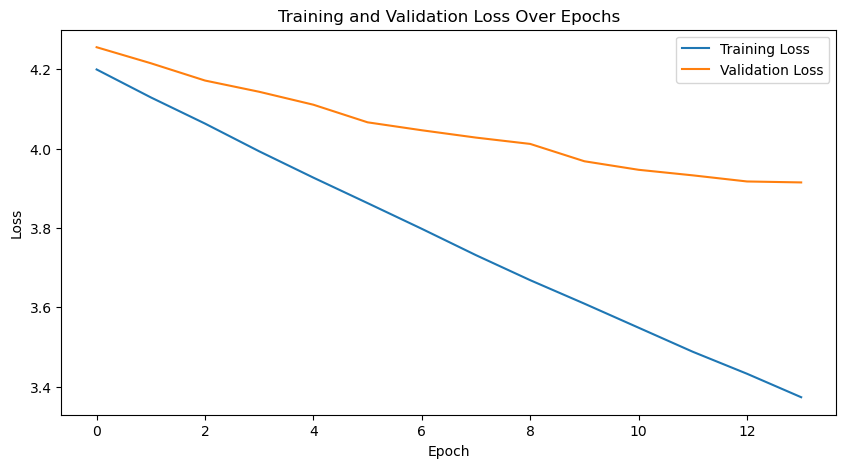

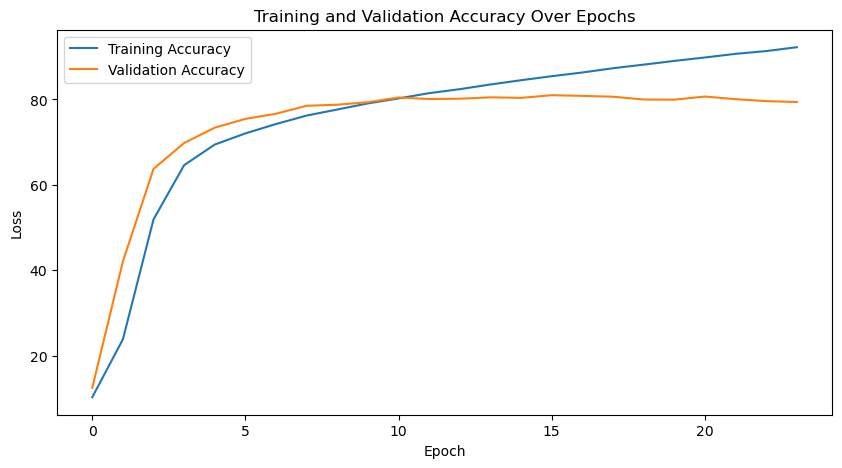

Extracting Embeddings: 100%|██████████| 51/51 [00:05<00:00,  9.39it/s]


Distance between embedding 1232 and 3289: 1.6483
Distance between embedding 1232 and 4894: 0.8296
Distance between embedding 1232 and 2910: 1.7431
Distance between embedding 1232 and 40: 1.8027
Distance between embedding 1232 and 4073: 1.1018
Distance between embedding 1232 and 2527: 1.7282
Distance between embedding 1232 and 5906: 1.6517
Distance between embedding 1232 and 4098: 1.4739
Distance between embedding 1232 and 1432: 1.8184
Distance between embedding 1232 and 481: 1.5328
Distance between embedding 1232 and 2374: 1.5103
Distance between embedding 1232 and 6418: 1.7374
Distance between embedding 1232 and 4323: 1.8793
Distance between embedding 1232 and 4363: 1.9076
Distance between embedding 1232 and 2435: 1.5678
Distance between embedding 1232 and 5335: 1.7222
Distance between embedding 1232 and 5898: 1.6469
Distance between embedding 1232 and 4194: 1.7130
Distance between embedding 1232 and 1657: 1.6196
Distance between embedding 3289 and 4894: 1.5255
Distance between embedd

Testing: 100%|██████████| 51/51 [00:05<00:00,  9.88it/s]


Test Accuracy: 80.99%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 31/1000:   3%|▎         | 32/1000 [58:40<29:34:44, 110.00s/it, val_loss=3.85, val_contrastive=1.51, val_accuracy=79.3, train_loss=3.16, train_contrastive=1.5, best_accuracy=80.9, best_loss=3.84] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:05<00:00,  9.17it/s]


Test Accuracy: 80.94%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 28/1000:   3%|▎         | 29/1000 [53:50<30:02:40, 111.39s/it, val_loss=3.83, val_contrastive=1.54, val_accuracy=80.6, train_loss=3.24, train_contrastive=1.53, best_accuracy=81.9, best_loss=3.83]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:06<00:00,  8.29it/s]


Test Accuracy: 81.87%
Test Precision: 0.82
Test Recall: 0.82
Test F1 Score: 0.82
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 27/1000:   3%|▎         | 28/1000 [51:59<30:04:47, 111.41s/it, val_loss=3.87, val_contrastive=1.51, val_accuracy=79.9, train_loss=3.28, train_contrastive=1.54, best_accuracy=80.4, best_loss=3.87]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:06<00:00,  8.36it/s]


Test Accuracy: 80.38%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 23/1000:   2%|▏         | 24/1000 [44:47<30:21:28, 111.98s/it, val_loss=3.83, val_contrastive=1.53, val_accuracy=79.4, train_loss=3.38, train_contrastive=1.55, best_accuracy=80.8, best_loss=3.83]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:06<00:00,  8.04it/s]


Test Accuracy: 80.82%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 24/1000:   2%|▎         | 25/1000 [46:32<30:14:56, 111.69s/it, val_loss=3.75, val_contrastive=1.55, val_accuracy=81.3, train_loss=3.27, train_contrastive=1.54, best_accuracy=82.6, best_loss=3.75]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:05<00:00,  8.59it/s]


Test Accuracy: 82.56%
Test Precision: 0.83
Test Recall: 0.83
Test F1 Score: 0.83
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 34/1000:   4%|▎         | 35/1000 [1:05:01<29:52:53, 111.48s/it, val_loss=3.93, val_contrastive=1.48, val_accuracy=76.9, train_loss=3.21, train_contrastive=1.48, best_accuracy=78.6, best_loss=3.93]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:06<00:00,  8.09it/s]


Test Accuracy: 78.57%
Test Precision: 0.79
Test Recall: 0.79
Test F1 Score: 0.79
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 28/1000:   3%|▎         | 29/1000 [53:49<30:02:27, 111.38s/it, val_loss=3.77, val_contrastive=1.52, val_accuracy=79.2, train_loss=3.09, train_contrastive=1.51, best_accuracy=81.1, best_loss=3.76]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:06<00:00,  8.09it/s]


Test Accuracy: 81.06%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 29/1000:   3%|▎         | 30/1000 [55:55<30:08:04, 111.84s/it, val_loss=3.81, val_contrastive=1.47, val_accuracy=79.4, train_loss=3.16, train_contrastive=1.51, best_accuracy=81.2, best_loss=3.81]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:06<00:00,  8.43it/s]


Test Accuracy: 81.22%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 24/1000:   2%|▎         | 25/1000 [46:21<30:07:40, 111.24s/it, val_loss=3.97, val_contrastive=1.53, val_accuracy=79.1, train_loss=3.55, train_contrastive=1.58, best_accuracy=79.7, best_loss=3.97]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:06<00:00,  8.36it/s]


Test Accuracy: 79.70%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10


Evaluating Noisy Samples: 100%|██████████| 10/10 [00:13<00:00,  1.34s/it]


54.41176470588235% relabeling accuracy


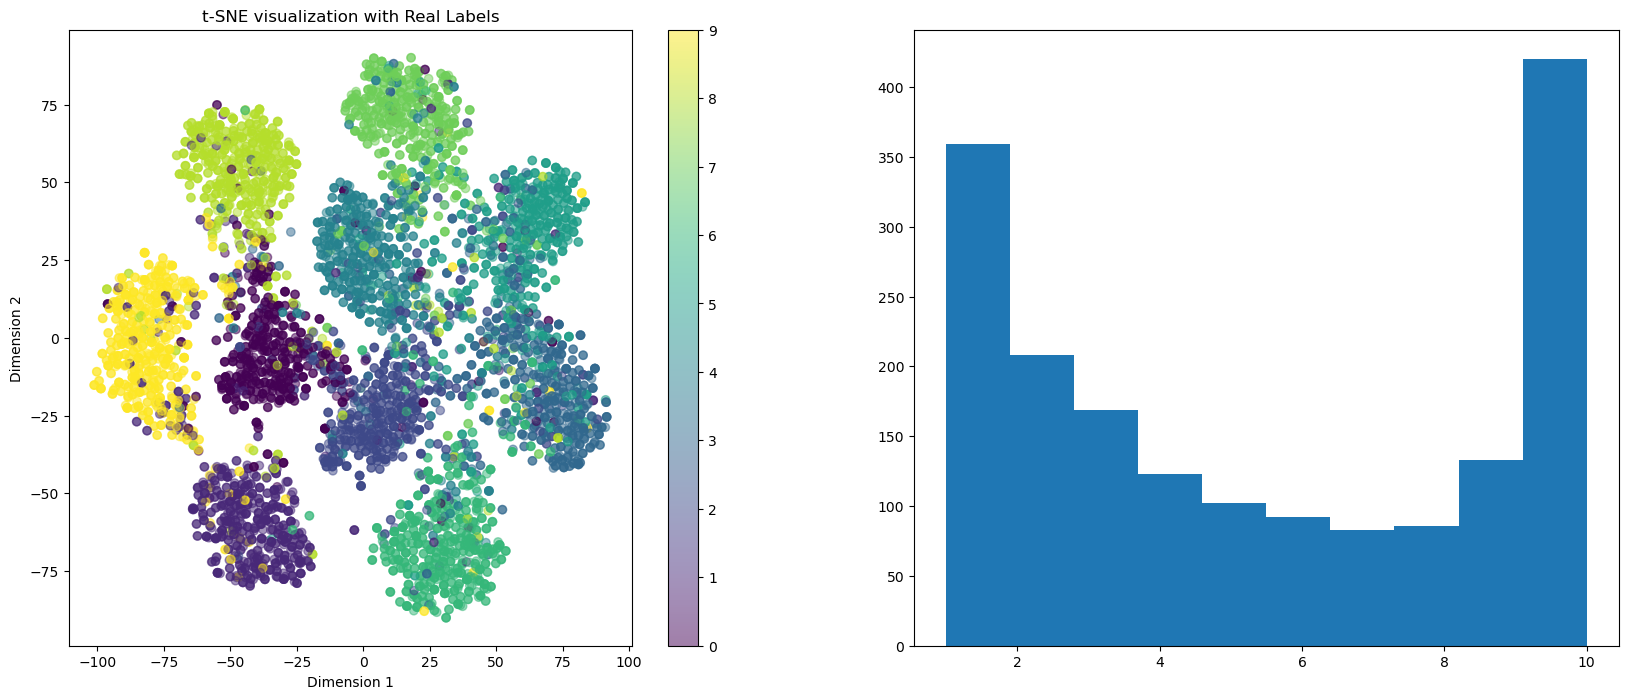

Predicted noise indices: [np.int64(140), np.int64(409), np.int64(417), np.int64(578), np.int64(611), np.int64(633), np.int64(810), np.int64(893), np.int64(959), np.int64(992), np.int64(996), np.int64(1263), np.int64(1316), np.int64(1370), np.int64(1510), np.int64(2058), np.int64(2068), np.int64(2085), np.int64(2113), np.int64(2120), np.int64(2197), np.int64(2237), np.int64(2294), np.int64(2374), np.int64(2387), np.int64(2448), np.int64(2468), np.int64(2551), np.int64(2734), np.int64(2941), np.int64(3090), np.int64(3097), np.int64(3109), np.int64(3175), np.int64(3180), np.int64(3354), np.int64(3421), np.int64(3575), np.int64(3682), np.int64(3868), np.int64(3872), np.int64(3952), np.int64(4053), np.int64(4275), np.int64(4377), np.int64(4481), np.int64(4587), np.int64(4755), np.int64(4900), np.int64(5078), np.int64(5097), np.int64(5100), np.int64(5248), np.int64(5329), np.int64(5475), np.int64(5576), np.int64(5887), np.int64(5895), np.int64(5915), np.int64(6028), np.int64(6033), np.int64(

In [3]:
noise_cleaner.clean()